# Project Block 2: Advanced Statistics
Instructions can be found at: https://rpubs.com/cdorante/tc3006c_p2

Ricardo Andrés Cáceres Villibord

A01706972

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/Colab Notebooks/DataScience/Módulo Estadística"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/DataScience/Módulo Estadística
dataus2023.csv	firmsus2023.csv  workshop1.ipynb


In [3]:
data = pd.read_csv('dataus2023.csv')
data.shape

(533088, 21)

In [4]:
firms = pd.read_csv('firmsus2023.csv')
firms.shape
data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.332411,104.0000,452000.000,NaN,2000
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,5057000.0,1622000.0,2679000.0,2186000.0,0.0,44.911205,73.7500,452271.967,1453000.0,2000
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,5344000.0,1762000.0,2925000.0,2510000.0,0.0,29.801249,48.9375,453014.579,1581000.0,2000
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,5655000.0,1853000.0,3160000.0,2758000.0,0.0,33.340861,54.7500,456366.381,1741000.0,2000
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,5461000.0,2129000.0,3667000.0,3070000.0,0.0,18.713509,30.7300,456769.737,1821000.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.780000,2.7800,104098.538,NaN,2022
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.430000,2.4300,104098.538,NaN,2022
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104098.538,NaN,2023
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104098.538,NaN,2023


### 2. Hacemos un merge para adicionar la industria y el status a data:

In [5]:
# Convertir las fechas de la columna 'q' en el formato de trimestres y almacenar en la nueva columna de 'qdate'
data['qdate'] = pd.PeriodIndex(data.q, freq="Q")
data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.332411,104.0000,452000.000,NaN,2000,2000Q1
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,1622000.0,2679000.0,2186000.0,0.0,44.911205,73.7500,452271.967,1453000.0,2000,2000Q2
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,1762000.0,2925000.0,2510000.0,0.0,29.801249,48.9375,453014.579,1581000.0,2000,2000Q3
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,1853000.0,3160000.0,2758000.0,0.0,33.340861,54.7500,456366.381,1741000.0,2000,2000Q4
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,2129000.0,3667000.0,3070000.0,0.0,18.713509,30.7300,456769.737,1821000.0,2001,2001Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.780000,2.7800,104098.538,NaN,2022,2022Q3
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.430000,2.4300,104098.538,NaN,2022,2022Q4
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104098.538,NaN,2023,2023Q1
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104098.538,NaN,2023,2023Q2


In [6]:
firms.columns
# Sacar lo necesario
firms1 = firms[["empresa", "Nombre", "status", "naics1"]]
# Ponerles un nombre a las columnas
firms1.columns=['firm', 'Empresa', 'status', 'industria']

# HACER EL MERGE de data y firms1
# El 'on=firm' especifica que la columna 'firm' se utilizara com clave para la fusion. Las filas que tienen el mismo valor en la columna 'firm' se fusionaran
# El 'how=left' especifica que es un left join
data = pd.merge(data, firms1, on="firm", how="left")

data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate,Empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.332411,104.0000,452000.000,NaN,2000,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,0.0,44.911205,73.7500,452271.967,1453000.0,2000,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,0.0,29.801249,48.9375,453014.579,1581000.0,2000,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,0.0,33.340861,54.7500,456366.381,1741000.0,2000,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,0.0,18.713509,30.7300,456769.737,1821000.0,2001,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [7]:
# Esto significa que el DataFrame 'data' tendrá un índice jerárquico con dos niveles, donde "firm" es el primer nivel y "qdate" es el segundo nivel.
data.set_index(["firm", "qdate"], inplace=True)
data

q  fiscalmonth     revenue       cogs       sgae  \
firm   qdate                                                           
A      2000Q1  2000q1          NaN         NaN        NaN        NaN   
       2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.0   
       2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.0   
       2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
       2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.0   
...               ...          ...         ...        ...        ...   
ZY_old 2022Q3  2022q3          NaN         NaN        NaN        NaN   
       2022Q4  2022q4          NaN         NaN        NaN        NaN   
       2023Q1  2023q1          NaN         NaN        NaN        NaN   
       2023Q2  2023q2          NaN         NaN        NaN        NaN   
       2023Q3  2023q3          NaN         NaN        NaN        NaN   

               otherincome  extraordinaryitems  finexp  incometax  \
firm   qdate                                                        
A      2000Q1          NaN                 NaN     NaN        NaN   
       2000Q2      73000.0                 0.0     0.0   161000.0   
       2000Q3     101000.0                 0.0     0.0   244000.0   
       2000Q4     111000.0                 0.0     0.0   407000.0   
       2001Q1      19000.0            -25000.0     0.0   119000.0   
...                    ...                 ...     ...        ...   
ZY_old 2022Q3          NaN                 NaN     NaN        NaN   
       2022Q4          NaN                 NaN     NaN        NaN   
       2023Q1          NaN                 NaN     NaN        NaN   
       2023Q2          NaN                 NaN     NaN        NaN   
       2023Q3          NaN                 NaN     NaN        NaN   

               totalassets  ...  currentliabilities  longdebt   adjprice  \
firm   qdate                ...                                            
A      2000Q1          NaN  ...                 NaN       NaN  63.332411   
       2000Q2    7321000.0  ...           2186000.0       0.0  44.911205   
       2000Q3    7827000.0  ...           2510000.0       0.0  29.801249   
       2000Q4    8425000.0  ...           2758000.0       0.0  33.340861   
       2001Q1    9208000.0  ...           3070000.0       0.0  18.713509   
...                    ...  ...                 ...       ...        ...   
ZY_old 2022Q3          NaN  ...                 NaN       NaN   2.780000   
       2022Q4          NaN  ...                 NaN       NaN   2.430000   
       2023Q1          NaN  ...                 NaN       NaN        NaN   
       2023Q2          NaN  ...                 NaN       NaN        NaN   
       2023Q3          NaN  ...                 NaN       NaN        NaN   

               originalprice  sharesoutstanding  fixedassets  year  \
firm   qdate                                                         
A      2000Q1       104.0000         452000.000          NaN  2000   
       2000Q2        73.7500         452271.967    1453000.0  2000   
       2000Q3        48.9375         453014.579    1581000.0  2000   
       2000Q4        54.7500         456366.381    1741000.0  2000   
       2001Q1        30.7300         456769.737    1821000.0  2001   
...                      ...                ...          ...   ...   
ZY_old 2022Q3         2.7800         104098.538          NaN  2022   
       2022Q4         2.4300         104098.538          NaN  2022   
       2023Q1            NaN         104098.538          NaN  2023   
       2023Q2            NaN         104098.538          NaN  2023   
       2023Q3            NaN         104098.538          NaN  2023   

                                 Empresa     status  \
firm   qdate                                          
A      2000Q1  Agilent Technologies, Inc     activo   
       2000Q2  Agilent Technologies, Inc     activo   
       2000Q3  Agilent Technologies, Inc     activo   
       200

### 3. Calculation of Financial Variables and Ratios

In [8]:
# Quarterly Returns
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))
# Log Annual Returns
data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))

# Calculo retornos 1 año en el futuro
data['f1rq'] =  data['rq'].shift(-1)
data['f4rq'] = data['rq'].shift(-4)

# Calculate operating profit (also called earnings before interest and taxes) : ebit = revenue - cogs - sgae
data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']

# Calculate operating profit margin: opm = ebit / revenue
data['opm'] = np.where(data['revenue']==0, np.NaN,data['ebit'] / data['revenue'])

# Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']

# Calculate profit margin (ratio) as: pm = ni / revenue
data['pm'] = np.where(data['revenue']==0, np.NaN, data['netincome'] / data['revenue'])

# Calculate asset turn over ratio: ato = revenue / totalassets   = que tanto la empresa vendio con respecto a su total de activos
data['ato'] = np.where(data['totalassets']==0, np.NaN, data['revenue'] / data['totalassets'])

# Calculate acid ratio: acidratio = currentassets / currentliabilities
data['acidratio'] = np.where(data['currentliabilities']==0, np.NaN, data['currentassets'] / data['currentliabilities'])

# Calculate financial leverage ratio as: finlev=longdebt / totalassets    =  apalancamiento; que tanto la empresa debe $ con respecto a lo que tienen en activo
data['finlev'] = np.where(data['totalassets']==0, np.NaN, data['longdebt'] / data['totalassets'])

# Calculate market value as: mvalue = originalprice * sharesoutstanding
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']

# Calculate book value as: bookvalue = totalassets - totalliabilities
data['bookvalue'] = data['totalassets'] - data['totalliabilities']


# # Para poder leer mejor los numeros, los formateamos con comas y a dos puntos decimales
pd.options.display.float_format = '{:,.2f}'.format

data.head()

q  fiscalmonth       revenue         cogs         sgae  \
firm qdate                                                                 
A    2000Q1  2000q1          NaN           NaN          NaN          NaN   
     2000Q2  2000q2         6.00  4,731,000.00 2,421,000.00 1,925,000.00   
     2000Q3  2000q3         9.00  7,401,000.00 3,790,000.00 3,016,000.00   
     2000Q4  2000q4        12.00 10,773,000.00 5,522,000.00 4,198,000.00   
     2001Q1  2001q1         3.00  2,841,000.00 1,449,000.00 1,113,000.00   

             otherincome  extraordinaryitems  finexp  incometax  totalassets  \
firm qdate                                                                     
A    2000Q1          NaN                 NaN     NaN        NaN          NaN   
     2000Q2    73,000.00                0.00    0.00 161,000.00 7,321,000.00   
     2000Q3   101,000.00                0.00    0.00 244,000.00 7,827,000.00   
     2000Q4   111,000.00                0.00    0.00 407,000.00 8,425,000.00   
     2001Q1    19,000.00          -25,000.00    0.00 119,000.00 9,208,000.00   

             ...  f4rq         ebit  opm  netincome   pm  ato  acidratio  \
firm qdate   ...                                                           
A    2000Q1  ... -0.58          NaN  NaN        NaN  NaN  NaN        NaN   
     2000Q2  ...  0.06   385,000.00 0.08 297,000.00 0.06 0.65       2.31   
     2000Q3  ... -0.51   595,000.00 0.08 452,000.00 0.06 0.95       2.13   
     2000Q4  ...  0.38 1,053,000.00 0.10 757,000.00 0.07 1.28       2.05   
     2001Q1  ...  0.20   279,000.00 0.10 154,000.00 0.05 0.31       1.78   

             finlev        mvalue    bookvalue  
firm qdate                                      
A    2000Q1     NaN 47,008,000.00          NaN  
     2000Q2    0.00 33,355,057.57 4,642,000.00  
     2000Q3    0.00 22,169,400.96 4,902,000.00  
     2000Q4    0.00 24,986,059.36 5,265,000.00  
     2001Q1    0.00 14,036,533.81 5,541,000.00  

[5 rows x 36 columns]

### 4. Firm Composition of the US Financial Market

Considering the **most recent** financial quarter of the dataset

In [9]:
# Sacar el quarter mas reciente
aux = data['q'] == '2023q2'
a_2023q2 =  data[aux]

- Show how many active firms by industry there are in the sample

In [10]:
# Sacar las status activo
aux2 = a_2023q2['status'] == 'activo'
active_2023q2 = a_2023q2[aux2]
active_firms_industry = active_2023q2['industria'].value_counts()
active_firms_industry

Industrias manufactureras                                                                        1540
Servicios financieros y de seguros                                                                686
Información en medios masivos                                                                     256
Comercio al por menor                                                                             145
Servicios profesionales, científicos y técnicos                                                   137
Servicios de apoyo a los negocios y manejo de residuos y desechos, y servicios de remediación     128
Minería, explotación de canteras y extracción de petróleo y gas                                   113
Comercio al por mayor                                                                              79
Empresas de electricidad, gas y agua                                                               77
Servicios de alojamiento temporal y de preparación de alimentos y bebidas         

- For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

In [11]:
active_2023q2.head()

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2023Q2,2023q2,6.00,"3,473,000.00","1,581,000.00","1,083,000.00","6,000.00",0.00,"28,000.00","133,000.00","10,792,000.00",...,NaN,"809,000.00",0.23,"654,000.00",0.19,0.32,2.37,0.25,"35,518,942.11","5,781,000.00"
AA,2023Q2,2023q2,6.00,"5,354,000.00","4,919,000.00","601,000.00","-60,000.00","20,000.00","53,000.00","74,000.00","14,128,000.00",...,-0.31,"-166,000.00",-0.03,"-333,000.00",-0.06,0.38,1.80,0.13,"6,053,162.45","6,458,000.00"
AAIC,2023Q2,2023q2,6.00,"26,716.00","16,512.00",NaN,0.00,NaN,0.00,"1,496.00","817,470.00",...,NaN,NaN,NaN,NaN,NaN,0.03,NaN,0.11,"162,125.89","220,012.00"
AAL,2023Q2,2023q2,6.00,"26,244,000.00",0.00,"23,644,000.00","-21,000.00",0.00,"800,000.00","431,000.00","67,260,000.00",...,NaN,"2,600,000.00",0.10,"1,348,000.00",0.05,0.39,0.75,0.46,"11,712,353.39","-4,385,000.00"
AAME,2023Q2,2023q2,6.00,"95,457.00",0.00,NaN,0.00,NaN,0.00,101.00,"372,955.00",...,NaN,NaN,NaN,NaN,NaN,0.26,NaN,NaN,"39,381.07","103,486.00"


In [12]:
# Primero reseteamos el index para que ya no haya multindex como vimos en el head anterior. Asi no va a haber problema para sacar el count de 'firm'
active_2023q2_reset = active_2023q2.reset_index()

# Agrupa por industria y luego con el '.agg' aplicamos funciones de agrgacion a cada grupo. Las funcionaes de agregacion se aplican a columnas especificas en cada grupo.
industrySummary = active_2023q2_reset.groupby('industria').agg(
    {
        'firm': 'count',
        'mvalue': ['min','max','mean','median','std'],
        'bookvalue': ['min','max','mean','median','std']
    }
)

industrySummary

firm       mvalue  \
                                                   count          min   
industria                                                               
-                                                      2 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    17     3,687.58   
Comercio al por mayor                                 79     5,458.41   
Comercio al por menor                                145     3,795.68   
Construcción                                          46     2,212.28   
Empresas de electricidad, gas y agua                  77    33,728.24   
Industrias manufactureras                           1540       796.17   
Información en medios masivos                        256     3,256.72   
Minería, explotación de canteras y extracción d...   113        34.17   
Otros servicios excepto actividades gubernament...    17    16,742.10   
Servicios de alojamiento temporal y de preparac...    71     9,806.64   
Servicios de apoyo a los negocios y manejo de r...   128     2,802.16   
Servicios de esparcimiento culturales y deporti...    24     3,092.33   
Servicios de salud y de asistencia social             63       717.42   
Servicios educativos                                  13    83,986.36   
Servicios financieros y de seguros                   686     5,559.04   
Servicios inmobiliarios y de alquiler de bienes...    68     3,440.61   
Servicios profesionales, científicos y técnicos      137     3,638.32   
Transportes, correos y almacenamiento                 70    29,816.46   

                                                                     \
                                                                max   
industria                                                             
-                                                      5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...    45,050,089.23   
Comercio al por mayor                                 57,645,136.00   
Comercio al por menor                              1,337,539,706.77   
Construcción                                          41,504,950.92   
Empresas de electricidad, gas y agua                 150,159,578.58   
Industrias manufactureras                          3,050,896,326.94   
Información en medios masivos                      2,532,080,938.79   
Minería, explotación de canteras y extracción d...    69,808,657.11   
Otros servicios excepto actividades gubernament...     9,764,061.13   
Servicios de alojamiento temporal y de preparac...   217,470,301.71   
Servicios de apoyo a los negocios y manejo de r...   444,875,318.55   
Servicios de esparcimiento culturales y deporti...   163,141,789.33   
Servicios de salud y de asistencia social             83,514,600.50   
Servicios educativos                                   3,171,234.18   
Servicios financieros y de seguros                   750,735,436.68   
Servicios inmobiliarios y de alquiler de bienes...   195,201,712.35   
Servicios profesionales, científicos y técnicos    1,519,830,900.00   
Transportes, correos y almacenamiento                153,955,377.34   

                                                                               \
                                                            mean       median   
industria                                                                       
-                                                   5,231,091.58 5,231,091.58   
Agricultura, ganadería, aprovechamiento foresta...  7,682,534.32   857,921.50   
Comercio al por mayor                               6,028,485.16 1,450,954.00   
Comercio al por menor                              24,720,931.28 1,662,158.77   
Construcción                                        5,996,741.18 2,559,768.80   
Empresas de electricidad, gas y agua               15,446,636.74 5,192,340.89   
Industrias manufactureras                          12,901,394.10   684,326.81   
Información en medios masivos                      23,394,300.99 2,370,1

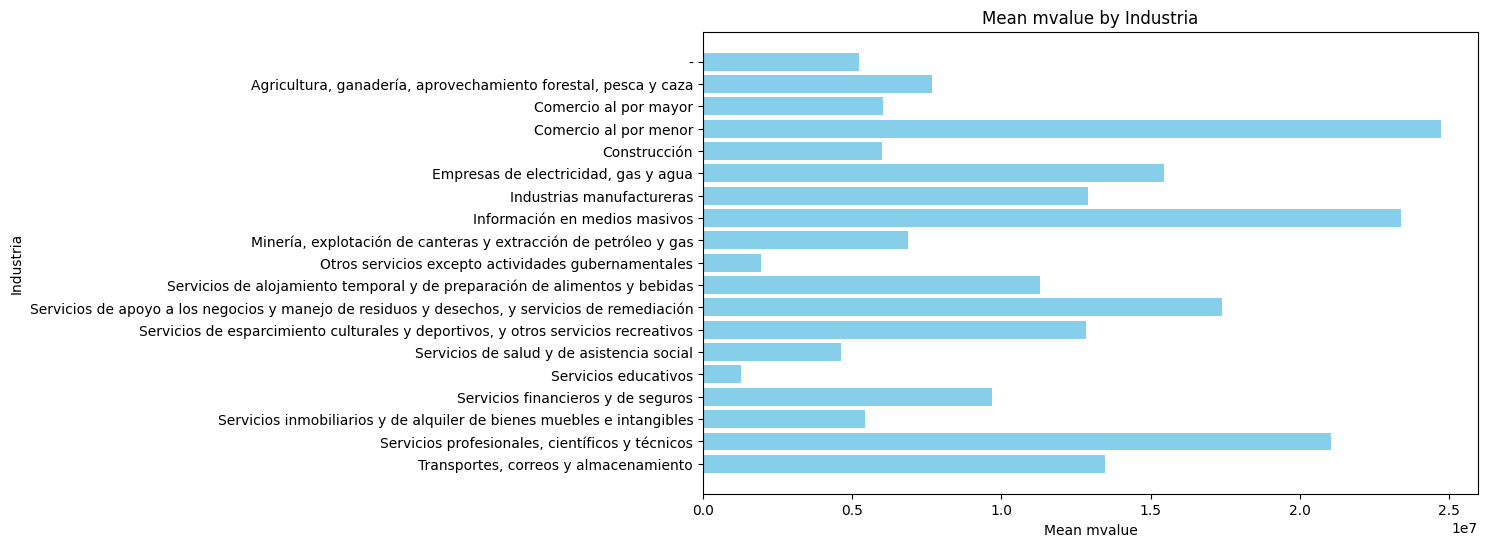

In [13]:
# Extraer el mean the 'market value' para cada industria
mean_mvalue = industrySummary['mvalue']['mean']

# Extraer la industria como si fuera un index
industrias = industrySummary.index

# Graficar para darnos una mejor idea de como esta distribuido
plt.figure(figsize=(10, 6))
plt.barh(industrias, mean_mvalue, color='skyblue')
plt.xlabel('Mean mvalue')
plt.ylabel('Industria')
plt.title('Mean mvalue by Industria')
plt.gca().invert_yaxis()
plt.show()

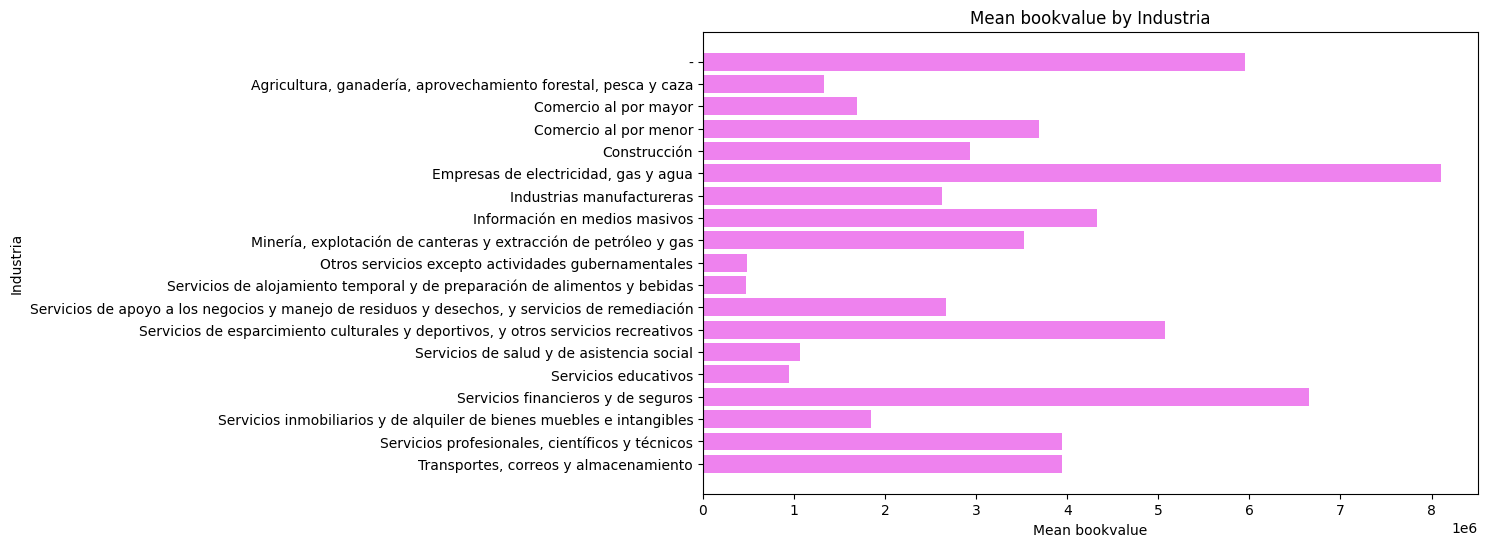

In [14]:
# Extraer el mean the 'market value' para cada industria
mean_bookvalue = industrySummary['bookvalue']['mean']

# Extraer la industria como si fuera un index
industrias = industrySummary.index

# Graficar para darnos una mejor idea de como esta distribuido
plt.figure(figsize=(10, 6))
plt.barh(industrias, mean_bookvalue, color='violet')
plt.xlabel('Mean bookvalue')
plt.ylabel('Industria')
plt.title('Mean bookvalue by Industria')
plt.gca().invert_yaxis()
plt.show()

*PODEMOS OBSERVAR COMO EN LOS PROMEDIOS DE MARKET VALUE, HAY DOS INDUSTRIAS QUE SOBRESALEN, LA DE COMERCIO AL POR MENOR Y LA DE INFORMACIÓN EN MEDIOS MASIVOS. SIN EMBARGO ESTO CAMBIA CUANDO NOS VAMOS AL BOOK VALUE, EN EL BOOK VALUE LAS INDUSTRIAS QUE SOBRESALEN SON LAS EMPRESAS DE ELECTRICIDAD, GAS Y AGUA Y LAS DE SERVICIOS FINANCIEROS Y DE SEGUROS*

In [15]:
# Hacer otra tabla para que pueda leer mejor
industrySummary = active_2023q2_reset.pivot_table(
    index='industria',
    values=['mvalue', 'bookvalue'],
    aggfunc=['min', 'max', 'mean']
)

In [16]:
# Descriptive statistics for market value and book value for each industry
industrySummary.describe()

min                         max                   \
           bookvalue       mvalue      bookvalue           mvalue   
count          19.00        19.00          19.00            19.00   
mean   -3,231,163.30   286,508.54  91,834,246.00   570,083,010.93   
std     5,091,190.33 1,197,550.00 136,391,027.43   900,069,089.23   
min   -15,493,000.00        34.17   1,976,851.00     3,171,234.18   
25%    -4,275,783.00     2,947.24   7,995,000.00    51,347,612.61   
50%    -1,403,000.00     3,687.58  29,111,000.00   153,955,377.34   
75%      -374,381.00    13,274.37 135,329,000.00   597,805,377.61   
max     5,948,964.00 5,231,091.58 539,883,000.00 3,050,896,326.94   

              mean                
         bookvalue        mvalue  
count        19.00         19.00  
mean  3,224,244.15 10,908,930.03  
std   2,141,734.77  6,979,393.28  
min     469,942.55  1,285,681.43  
25%   1,507,944.53  5,715,319.22  
50%   2,934,480.25  9,689,768.58  
75%   4,136,329.32 14,450,301.30  
max   8,103,910.74 24,720,931.28

In [17]:
# Calculate standard deviation for market value and book value for each industry
industrySummary.std()

min   bookvalue     5,091,190.33
      mvalue        1,197,550.00
max   bookvalue   136,391,027.43
      mvalue      900,069,089.23
mean  bookvalue     2,141,734.77
      mvalue        6,979,393.28
dtype: float64

*DE TODO ESTE ANALISIS DESCRIPTIVO, PODEMOS OBSERVAR COMO BOOKVALUE TIENE UNA DESCIACION ESTANDAR RELATIVAMENTE ALTA , LO QUE SUGIERE UNA VARIABLIDAD SUSTANCIAL EN LOS VALORES CONTABLES DE LAS EMPRESAS. MIENTRAS QUE MVALUE TIENE UN RANGO MAS PEQUEÑO DE VALORES Y UNA MEDIA POSITIVA A DIFERENCIA DE BOOKVALUE QUE TIENE UNA MEDIA NEGATIVA. TAMBIEN TIENE UNA DESVIACION ESTANDAR MENOR A BOOKVALUE, LO QUE INDICA MENOS VARIABILIDAD EN LOS VALORES DE MERCADO DE LAS EMPRESAS.*

- Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [18]:
# Sortear el the dataset por 'mvalue' en orden de mayor a menor
sorted_data = active_2023q2_reset.sort_values(by='mvalue', ascending=False)

# Seleccionar las 10 con mas valor
top_10_firms_mvalue = sorted_data.head(10)

# El typical size es el mean de todas las industrias
typical_size_mvalue = active_2023q2_reset['mvalue'].mean()

# Calcular la desviacion de la typical size
top_10_firms_mvalue['deviation_from_typical'] = top_10_firms_mvalue['mvalue'] - typical_size_mvalue

# Print las top 10 con su desviacion de la typical size
top_10_firms_mvalue[['firm', 'mvalue', 'deviation_from_typical']]

<ipython-input-18-93cc6b7838b5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_firms_mvalue['deviation_from_typical'] = top_10_firms_mvalue['mvalue'] - typical_size_mvalue


,firm,mvalue,deviation_from_typical
8,AAPL,"3,050,896,326.94","3,037,693,265.83"
2111,MSFT,"2,532,080,938.79","2,518,877,877.68"
1381,GOOGL,"1,519,830,900.00","1,506,627,838.89"
193,AMZN,"1,337,539,706.77","1,324,336,645.65"
2263,NVDA,"1,044,859,400.00","1,031,656,338.89"
3183,TSLA,"829,681,140.87","816,478,079.76"
497,BRK_A,"750,735,436.68","737,532,375.57"
2009,META,"735,452,839.12","722,249,778.00"
3263,UNH,"447,491,234.90","434,288,173.78"
1874,LLY,"445,190,020.12","431,986,959.00"


- Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [19]:
# Sortear el the dataset por 'bookvalue' en orden de mayor a menor
sorted_data = active_2023q2_reset.sort_values(by='bookvalue', ascending=False)

# Seleccionar las 10 con mas valor
top_10_firms_bookvalue = sorted_data.head(10)

# El typical size es el mean de todas las industrias
typical_size_bookvalue = active_2023q2_reset['bookvalue'].mean()

# Calcular la desviacion de la typical size
top_10_firms_bookvalue['deviation_from_typical'] = top_10_firms_bookvalue['bookvalue'] - typical_size_bookvalue

# Print las top 10 con su desviacion de la typical size
top_10_firms_bookvalue[['firm', 'bookvalue', 'deviation_from_typical']]

<ipython-input-19-6d0f48f76e6b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_firms_bookvalue['deviation_from_typical'] = top_10_firms_bookvalue['bookvalue'] - typical_size_bookvalue


,firm,bookvalue,deviation_from_typical
497,BRK_A,"539,883,000.00","536,184,026.90"
1728,JPM,"312,516,000.00","308,817,026.90"
365,BAC,"283,319,000.00","279,620,026.90"
1381,GOOGL,"267,141,000.00","263,442,026.90"
541,C,"209,422,000.00","205,723,026.90"
3507,XOM,"206,997,000.00","203,298,026.90"
2111,MSFT,"206,223,000.00","202,524,026.90"
3429,WFC,"181,952,000.00","178,253,026.90"
193,AMZN,"168,602,000.00","164,903,026.90"
854,CVX,"159,298,000.00","155,599,026.90"


*AQUI PODEMOS OBSERVAR LA DIFERENCIA ENTRE EL MARKET VALUE DE LAS EMPRESAS, CON EL BOOK VALUE DE LAS EMPRESAS. POR EJEMPLO, APPLE, TIENE UN MAYOR MARKET VALUE A QUE EL BOOKVALUE, ESTO SE PUEDE DEBER A QUE LOS EL BOOK VALUE NORMALMENTE NO CONSIDERA ACTIVOS INTANGIBLES, COMO LO SON LOS DE APPLE. UNA GRAN PARTE DE APPLE SON ACTIVOS INTANGIBLES. LOS CONSUMIDORES ASOCIAN LA MARCA CON CALIDAD, INOVACION Y DISEÑO, POR LO QUE SUS INVERSORES CONFIAN QUE CONTINUARA GENERANDO GANANCIAS Y CRECIENDO ASI QUE COMPRAN ACCIONES DE LA EMPRESA.*

### 5. Evolution of the US financial market

Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :

In [20]:
datay = data.loc[data['fiscalmonth']==12]

- How the total market value of the US market has changed over the years? Do a table and/or graph and explain

In [21]:
fmarket = datay[['year', 'mvalue', 'revenue', 'netincome']]
fmarket = fmarket.reset_index()
fmarket

,firm,qdate,year,mvalue,revenue,netincome
0,A,2000Q4,2000,"24,986,059.36","10,773,000.00","757,000.00"
1,A,2001Q4,2001,"13,219,949.12","8,396,000.00","174,000.00"
2,A,2002Q4,2002,"8,387,758.60","6,010,000.00","-1,032,000.00"
3,A,2003Q4,2003,"13,922,599.19","6,056,000.00","-2,058,000.00"
4,A,2004Q4,2004,"11,732,870.20","7,181,000.00","349,000.00"
...,...,...,...,...,...,...
59092,ZYNE,2019Q4,2019,"140,115.98",0.00,"-32,943.58"
59093,ZYNE,2020Q4,2020,"97,149.28",0.00,"-51,336.83"
59094,ZYNE,2021Q4,2021,"118,706.51",0.00,"-37,309.02"
59095,ZYNE,2022Q4,2022,"24,943.24",0.00,"-35,035.81"


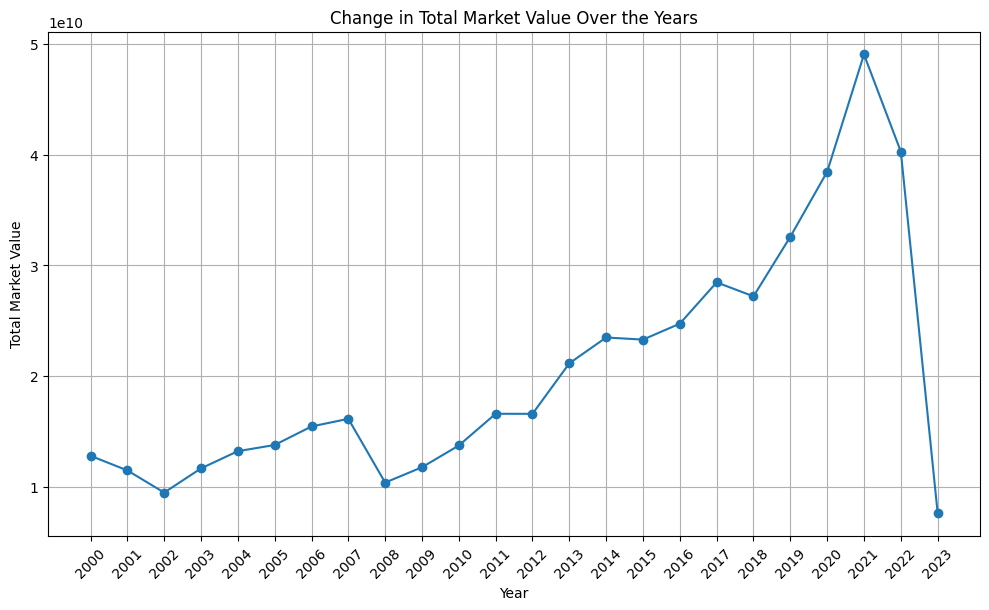

In [22]:
# Agrupar por año u calcular el market value
market_value_by_year = fmarket.groupby('year')['mvalue'].sum().reset_index()

# Graficar para ver como cambia el market value a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(market_value_by_year['year'], market_value_by_year['mvalue'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Market Value')
plt.title('Change in Total Market Value Over the Years')
plt.grid(True)
plt.tight_layout()
plt.xticks(market_value_by_year['year'], rotation=45)
plt.show()

- How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain

In [23]:
fmarket = datay[['year', 'mvalue', 'revenue', 'netincome']].groupby('year').sum()
fmarket

,mvalue,revenue,netincome
year,,,
2000,"12,814,978,634.15","6,380,672,838.05","344,723,426.83"
2001,"11,494,392,671.37","7,493,006,671.41","67,530,325.20"
2002,"9,494,723,157.61","7,320,441,084.79","-57,773,458.77"
2003,"11,675,951,523.21","7,924,776,768.22","364,552,095.88"
2004,"13,230,878,635.88","8,816,237,201.06","431,717,996.76"
2005,"13,789,108,526.52","9,645,438,810.16","522,880,104.83"
2006,"15,461,254,772.55","10,540,362,264.44","657,926,147.83"
2007,"16,149,130,338.06","11,256,645,716.63","610,497,891.61"
2008,"10,395,016,561.41","11,607,977,855.77","342,187,423.38"


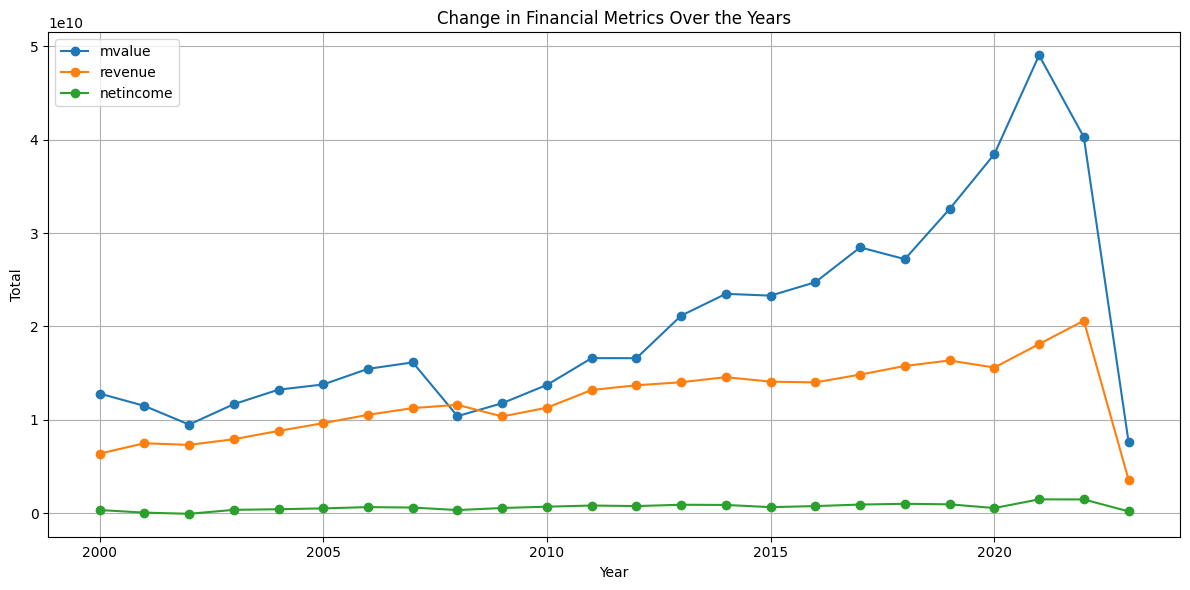

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(fmarket.index, fmarket['mvalue'], marker='o', linestyle='-', label='mvalue')
plt.plot(fmarket.index, fmarket['revenue'], marker='o', linestyle='-', label='revenue')
plt.plot(fmarket.index, fmarket['netincome'], marker='o', linestyle='-', label='netincome')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Change in Financial Metrics Over the Years')
plt.grid(True)
plt.legend()  # Add a legend to distinguish between the three lines
plt.tight_layout()
plt.show()

*PODEMOS OBSERVAR COMO HA CAMBIADO EL MARKET VALUE, EL NET INCOME Y EL REVENUE A LO LARGO DE LOS AÑOS. VEMOS QUE EL MARKET VALUE A INCREMENTADO A LO LARGO DEL TIEMPO, Y PODEMOS VISUALIZAR QUE EN EL 2008 HUBO UN BAJON POR EL FAMOSO MARKET CRASH. EL NETINCOME PODEMOS OBSERVAR COMO SE HA MANTENIDO RELATIVAMENTE ESTABLE. TAMBIEN NOS PODEMOS DAR CUENTA QUE COMO EL AÑO 2023 NO HA TERMINADO, ESTE SE MUESTRA EN LAS GRAFICAS COMO UN GRAN BAJON. PERO ESTO LO PODEMOS TOMAR COMO DATOS INCOMPLETOS YA QUE EL AÑO NO HA TERMINADO*

### 6. Learning about one Industry

Selecciono mi industria

- *Service Industries*


In [25]:
original_data = data
data = data.reset_index()
dataser = data.loc[
    (data['industria'] == 'Servicios de alojamiento temporal y de preparación de alimentos y bebidas') |
    (data['industria'] == 'Servicios de apoyo a los negocios y manejo de residuos y desechos, y servicios de remediación') |
    (data['industria'] == 'Servicios de esparcimiento cultural y deportivos, y otros servicios recreativos') |
    (data['industria'] == 'Servicios de salud y asistencia social') |
    (data['industria'] == 'Servicios educativos') |
    (data['industria'] == 'Servicios inmobiliarios y de alquiler de bienes muebles e intangibles') |
    (data['industria'] == 'Servicios profesionales, científicos y técnicos') |
    (data['industria'] == 'Transportes, correos y almacenamiento')
]
dataser['industria'].head(10)

190    Servicios profesionales, científicos y técnicos
191    Servicios profesionales, científicos y técnicos
192    Servicios profesionales, científicos y técnicos
193    Servicios profesionales, científicos y técnicos
194    Servicios profesionales, científicos y técnicos
195    Servicios profesionales, científicos y técnicos
196    Servicios profesionales, científicos y técnicos
197    Servicios profesionales, científicos y técnicos
198    Servicios profesionales, científicos y técnicos
199    Servicios profesionales, científicos y técnicos
Name: industria, dtype: object

#**Entregable Proyecto 2**

### For the Descriptive Statistics of your industry using only the most recent fiscal year observations (fiscalmonth=12, year=2022), do the following modifications:

In [26]:
# Using annual fiscal information, and the most recent complete year, and industrias que esten activas
dataser2022 = dataser.loc[(dataser['year']==2022) & (dataser['fiscalmonth']==12) & (dataser['status']=='activo')]
dataser2022.head()

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
566,AAL,2022Q4,2022q4,12.00,"48,971,000.00",0.00,"47,364,000.00","325,000.00",0.00,"1,746,000.00",...,NaN,"1,607,000.00",0.03,"127,000.00",0.00,0.76,0.71,0.50,"8,266,739.28","-5,799,000.00"
2558,ABM,2022Q4,2022q4,12.00,"7,806,600.00","6,757,500.00","700,300.00",0.00,"2,300.00","41,100.00",...,NaN,"348,800.00",0.04,"230,400.00",0.03,1.60,1.15,0.24,"2,913,982.38","1,717,300.00"
2748,ABNB,2022Q4,2022q4,12.00,"8,399,000.00","1,499,000.00","5,098,000.00","25,000.00",0.00,"-162,000.00",...,NaN,"1,802,000.00",0.21,"1,893,000.00",0.23,0.52,1.86,0.14,"54,136,649.15","5,560,000.00"
3033,ABSI,2022Q4,2022q4,12.00,"5,747.00",0.00,"112,497.00","2,357.00",0.00,972.00,...,NaN,"-106,750.00",-18.57,"-104,904.00",-18.25,0.02,6.17,0.05,"194,029.31","274,414.00"
4075,ACCD,2022Q1,2022q1,12.00,"310,021.00","169,019.00","266,727.00",-133.00,0.00,"2,905.00",...,0.61,"-125,725.00",-0.41,"-123,124.00",-0.40,0.24,3.66,0.24,"1,175,789.15","855,794.00"


In [27]:
dataser2022.columns

Index(['firm', 'qdate', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae',
       'otherincome', 'extraordinaryitems', 'finexp', 'incometax',
       'totalassets', 'currentassets', 'inventory', 'totalliabilities',
       'currentliabilities', 'longdebt', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fixedassets', 'year', 'Empresa', 'status',
       'industria', 'rq', 'ry', 'f1rq', 'f4rq', 'ebit', 'opm', 'netincome',
       'pm', 'ato', 'acidratio', 'finlev', 'mvalue', 'bookvalue'],
      dtype='object')

In [28]:
missing_values = dataser2022.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                    0
qdate                   0
q                       0
fiscalmonth             0
revenue                 0
cogs                    0
sgae                    5
otherincome             0
extraordinaryitems      5
finexp                  0
incometax               0
totalassets             0
currentassets           0
inventory              27
totalliabilities        0
currentliabilities     27
longdebt               22
adjprice                4
originalprice           4
sharesoutstanding       1
fixedassets             0
year                    0
Empresa                 0
status                  0
industria               0
rq                      6
ry                     13
f1rq                    4
f4rq                  398
ebit                    5
opm                     7
netincome               5
pm                      7
ato                     0
acidratio              28
finlev                 22
mvalue                  4
bookval

In [29]:
dataser2022 = dataser2022.fillna(0)

For the ratios, instead of calculating the arithmetic mean of the ratios, calculate the weighted average of the ratios. To calculate the weighted average of a ratio, you have to divide the sum of the numerator variable by the sum of the denominator variable. For example, to calculate the weighted average of profit margin you first sum all the net income of all firms and then divide it by the sum of revenue of all firms.

Compare this weighted average with the arithmetic mean and the median. Which is the best measure for central tendency of the ratios? Interpret the weighted average of profit margin and asset turn over of your industry.

In [30]:
ratio_columns = ['opm', 'pm', 'ato', 'acidratio', 'finlev']

ratios = []
weighted_avgs = []
arithmetic_means = []
medians = []

# Calculate the sum of ebit and revenue across all firms
sum_ebit = dataser2022['ebit'].sum()
sum_revenue = dataser2022['revenue'].sum()
# Calculate the weighted average profit margin
weighted_avg_opm = sum_ebit / sum_revenue
weighted_avgs.append(weighted_avg_opm)

# Calculate the sum of net income and revenue across all firms
sum_net_income = dataser2022['netincome'].sum()
sum_revenue = dataser2022['revenue'].sum()
# Calculate the weighted average profit margin
weighted_avg_pm = sum_net_income / sum_revenue
weighted_avgs.append(weighted_avg_pm)

# Calculate the sum of revenue and total assets across all firms
sum_total_assets = dataser2022['totalassets'].sum()
# Calculate the weighted average asset turnover
weighted_avg_ato = sum_revenue / sum_total_assets
weighted_avgs.append(weighted_avg_ato)

# Calculate the sum of current assets and current liabilities across all firms
sum_current_assets = dataser2022['currentassets'].sum()
sum_current_liabilities = dataser2022['currentliabilities'].sum()
# Calculate the weighted average acid test ratio
weighted_avg_acidratio = sum_current_assets / sum_current_liabilities
weighted_avgs.append(weighted_avg_acidratio)


# Calculate the sum of long-term debt and total assets across all firms
sum_long_debt = dataser2022['longdebt'].sum()
sum_total_assets = dataser2022['totalassets'].sum()
# Calculate the weighted average financial leverage ratio
weighted_avg_finlev = sum_long_debt / sum_total_assets
weighted_avgs.append(weighted_avg_finlev)



for ratio in ratio_columns:
  arithmetic_mean = np.mean(dataser2022[ratio])
  median = np.median(dataser2022[ratio])

  ratios.append(ratio)
  arithmetic_means.append(arithmetic_mean)
  medians.append(median)

result_df = pd.DataFrame({
    'Ratio': ratios,
    'Weighted Average': weighted_avgs,
    'Arithmetic Mean': arithmetic_means,
    'Median': medians
})

# Print the DataFrame
print(result_df)


       Ratio  Weighted Average  Arithmetic Mean  Median
0        opm              0.13            -1.83    0.06
1         pm              0.08            -2.49    0.04
2        ato              0.63             0.92    0.63
3  acidratio              1.29             2.83    1.42
4     finlev              0.34             0.31    0.27


***Tras hacer estos diferentes calculos, comparamos el wighted average, la media aritmetica y la mediana para los ratios. COn esto podemos ver diferentes perspectivas de la industria de Servicios. El profit margin (pm) tiene un weighted average de 0.08, lo que nos indica que, en promedio, las empresas en la insustria de Servicios retienen aproximadamente el 8% de sus ingresos como ganancia. Esta ponderación toma en cuenta el tamaño de cada empresa. Sin embargo, la media aritmetica es de -2.49, de esto podemos pensar que hay algo mal con los datos, o puede ser causado por algunos outliers. Y finalmente la mediana de 0.04 nos indica que el 50% de las empresas tienen un margen de beneficio por encima de 0.04. Esta ponderacion puede llegar a ser mejor que la media aritmetica porque no se mira influenciada por posibles outliers.***

***Si nos ponemos a interpretar y comparar el pm con el ato, podemos concluir que el weighted average de 0.08 del pm nos indica un nivel moderado de rentabilidad, mientras que el weighted average del ato, que es de 0.63, nos indica una utilizacion relativamente eficiente de los activos en la industria de Servicios.Y como vimos en la media aritmetica de pm, existen algunos outliers que podrian estar afectando. Por lo que es importante atenderlos.***

## 1.2 Multiple Regression - advanced topics

### 1.2.1 Calculation of Variables

For the complete historical dataset of annual fiscal years (fiscalmonth=12 for all quarter-years), you have to calculate the following new independent variables:

In [31]:
data = dataser.loc[(dataser['fiscalmonth']==12) & (dataser['status']=='activo')]
data

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
478,AAL,2000Q4,2000q4,12.00,"19,703,000.00",0.00,"18,322,000.00","68,000.00","34,000.00","162,000.00",...,NaN,"1,381,000.00",0.07,"813,000.00",0.04,0.75,0.74,0.21,NaN,"7,176,000.00"
482,AAL,2001Q4,2001q4,12.00,"18,963,000.00",0.00,"21,433,000.00","-2,000.00",0.00,"284,000.00",...,NaN,"-2,470,000.00",-0.13,"-1,762,000.00",-0.09,0.58,0.87,0.30,NaN,"5,373,000.00"
486,AAL,2002Q4,2002q4,12.00,"17,299,000.00",0.00,"20,629,000.00","-2,000.00","-988,000.00","528,000.00",...,NaN,"-3,330,000.00",-0.19,"-3,511,000.00",-0.20,0.57,0.68,0.41,NaN,"957,000.00"
490,AAL,2003Q4,2003q4,12.00,"17,440,000.00",0.00,"18,284,000.00","113,000.00",0.00,"577,000.00",...,NaN,"-844,000.00",-0.05,"-1,228,000.00",-0.07,0.59,0.71,0.45,NaN,"46,000.00"
494,AAL,2004Q4,2004q4,12.00,"18,645,000.00",0.00,"18,789,000.00","108,000.00",0.00,"725,000.00",...,NaN,"-144,000.00",-0.01,"-761,000.00",-0.04,0.65,0.71,0.47,NaN,"-581,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532117,ZS,2018Q3,2018q3,12.00,"190,174.00","37,875.00","186,923.00",79.00,0.00,"-2,236.00",...,-0.48,"-34,624.00",-0.18,"-33,646.00",-0.18,0.42,2.12,0.00,"4,884,348.32","240,236.00"
532121,ZS,2019Q3,2019q3,12.00,"302,836.00","59,669.00","278,480.00",-329.00,0.00,"-7,730.00",...,0.25,"-35,313.00",-0.12,"-28,655.00",-0.09,0.50,1.89,0.00,"6,023,519.80","308,558.00"
532125,ZS,2020Q3,2020q3,12.00,"431,269.00","95,733.00","449,492.00",-224.00,0.00,"-1,452.00",...,0.19,"-113,956.00",-0.26,"-115,116.00",-0.27,0.24,3.73,0.49,"18,698,591.43","484,829.00"
532129,ZS,2021Q3,2021q3,12.00,"673,100.00","150,317.00","730,595.00","1,186.00",0.00,"50,552.00",...,0.09,"-207,812.00",-0.31,"-262,029.00",-0.39,0.30,2.57,0.42,"36,379,348.94","528,895.00"


In [32]:
missing_values = data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                    0
qdate                   0
q                       0
fiscalmonth             0
revenue                 1
cogs                    1
sgae                   35
otherincome             1
extraordinaryitems     35
finexp                  1
incometax               1
totalassets             0
currentassets           8
inventory             279
totalliabilities        0
currentliabilities    279
longdebt              249
adjprice              226
originalprice         226
sharesoutstanding      82
fixedassets             1
year                    0
Empresa                 0
status                  0
industria               0
rq                    295
ry                    677
f1rq                  228
f4rq                  609
ebit                   35
opm                    63
netincome              35
pm                     63
ato                     1
acidratio             282
finlev                249
mvalue                277
bookval

In [33]:
data = data.fillna(0)
missing_values = data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                  0
qdate                 0
q                     0
fiscalmonth           0
revenue               0
cogs                  0
sgae                  0
otherincome           0
extraordinaryitems    0
finexp                0
incometax             0
totalassets           0
currentassets         0
inventory             0
totalliabilities      0
currentliabilities    0
longdebt              0
adjprice              0
originalprice         0
sharesoutstanding     0
fixedassets           0
year                  0
Empresa               0
status                0
industria             0
rq                    0
ry                    0
f1rq                  0
f4rq                  0
ebit                  0
opm                   0
netincome             0
pm                    0
ato                   0
acidratio             0
finlev                0
mvalue                0
bookvalue             0
dtype: int64


In [34]:
original_data = data
original_data

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,f4rq,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
478,AAL,2000Q4,2000q4,12.00,"19,703,000.00",0.00,"18,322,000.00","68,000.00","34,000.00","162,000.00",...,0.00,"1,381,000.00",0.07,"813,000.00",0.04,0.75,0.74,0.21,0.00,"7,176,000.00"
482,AAL,2001Q4,2001q4,12.00,"18,963,000.00",0.00,"21,433,000.00","-2,000.00",0.00,"284,000.00",...,0.00,"-2,470,000.00",-0.13,"-1,762,000.00",-0.09,0.58,0.87,0.30,0.00,"5,373,000.00"
486,AAL,2002Q4,2002q4,12.00,"17,299,000.00",0.00,"20,629,000.00","-2,000.00","-988,000.00","528,000.00",...,0.00,"-3,330,000.00",-0.19,"-3,511,000.00",-0.20,0.57,0.68,0.41,0.00,"957,000.00"
490,AAL,2003Q4,2003q4,12.00,"17,440,000.00",0.00,"18,284,000.00","113,000.00",0.00,"577,000.00",...,0.00,"-844,000.00",-0.05,"-1,228,000.00",-0.07,0.59,0.71,0.45,0.00,"46,000.00"
494,AAL,2004Q4,2004q4,12.00,"18,645,000.00",0.00,"18,789,000.00","108,000.00",0.00,"725,000.00",...,0.00,"-144,000.00",-0.01,"-761,000.00",-0.04,0.65,0.71,0.47,0.00,"-581,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532117,ZS,2018Q3,2018q3,12.00,"190,174.00","37,875.00","186,923.00",79.00,0.00,"-2,236.00",...,-0.48,"-34,624.00",-0.18,"-33,646.00",-0.18,0.42,2.12,0.00,"4,884,348.32","240,236.00"
532121,ZS,2019Q3,2019q3,12.00,"302,836.00","59,669.00","278,480.00",-329.00,0.00,"-7,730.00",...,0.25,"-35,313.00",-0.12,"-28,655.00",-0.09,0.50,1.89,0.00,"6,023,519.80","308,558.00"
532125,ZS,2020Q3,2020q3,12.00,"431,269.00","95,733.00","449,492.00",-224.00,0.00,"-1,452.00",...,0.19,"-113,956.00",-0.26,"-115,116.00",-0.27,0.24,3.73,0.49,"18,698,591.43","484,829.00"
532129,ZS,2021Q3,2021q3,12.00,"673,100.00","150,317.00","730,595.00","1,186.00",0.00,"50,552.00",...,0.09,"-207,812.00",-0.31,"-262,029.00",-0.39,0.30,2.57,0.42,"36,379,348.94","528,895.00"


- Firm size as a categorical variable. For each quarter, you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.

- Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method.

In [35]:
# Identificar valores faltantes (nan)
missing_values = original_data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                  0
qdate                 0
q                     0
fiscalmonth           0
revenue               0
cogs                  0
sgae                  0
otherincome           0
extraordinaryitems    0
finexp                0
incometax             0
totalassets           0
currentassets         0
inventory             0
totalliabilities      0
currentliabilities    0
longdebt              0
adjprice              0
originalprice         0
sharesoutstanding     0
fixedassets           0
year                  0
Empresa               0
status                0
industria             0
rq                    0
ry                    0
f1rq                  0
f4rq                  0
ebit                  0
opm                   0
netincome             0
pm                    0
ato                   0
acidratio             0
finlev                0
mvalue                0
bookvalue             0
dtype: int64


In [36]:
original_data.dropna(subset=["mvalue"], how="all", inplace=True)
def dense_inclusive_pct(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

original_data["pct"] = original_data.groupby('q')['mvalue'].apply(dense_inclusive_pct).astype(int)

original_data["isSmall"] = original_data.pct <= 33
original_data["isSmall"] = original_data["isSmall"].astype(int)

original_data["isMedium"] = (original_data.pct <= 66) & (original_data.pct > 33)
original_data["isMedium"] = original_data["isMedium"].astype(int)

original_data["isBig"] = (original_data.pct > 66)
original_data["isBig"] = original_data["isBig"].astype(int)

<ipython-input-36-bd2b82f0d34c>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  original_data["pct"] = original_data.groupby('q')['mvalue'].apply(dense_inclusive_pct).astype(int)


In [37]:
original_data

,firm,qdate,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,...,pm,ato,acidratio,finlev,mvalue,bookvalue,pct,isSmall,isMedium,isBig
478,AAL,2000Q4,2000q4,12.00,"19,703,000.00",0.00,"18,322,000.00","68,000.00","34,000.00","162,000.00",...,0.04,0.75,0.74,0.21,0.00,"7,176,000.00",0,1,0,0
482,AAL,2001Q4,2001q4,12.00,"18,963,000.00",0.00,"21,433,000.00","-2,000.00",0.00,"284,000.00",...,-0.09,0.58,0.87,0.30,0.00,"5,373,000.00",0,1,0,0
486,AAL,2002Q4,2002q4,12.00,"17,299,000.00",0.00,"20,629,000.00","-2,000.00","-988,000.00","528,000.00",...,-0.20,0.57,0.68,0.41,0.00,"957,000.00",0,1,0,0
490,AAL,2003Q4,2003q4,12.00,"17,440,000.00",0.00,"18,284,000.00","113,000.00",0.00,"577,000.00",...,-0.07,0.59,0.71,0.45,0.00,"46,000.00",0,1,0,0
494,AAL,2004Q4,2004q4,12.00,"18,645,000.00",0.00,"18,789,000.00","108,000.00",0.00,"725,000.00",...,-0.04,0.65,0.71,0.47,0.00,"-581,000.00",0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532117,ZS,2018Q3,2018q3,12.00,"190,174.00","37,875.00","186,923.00",79.00,0.00,"-2,236.00",...,-0.18,0.42,2.12,0.00,"4,884,348.32","240,236.00",78,0,0,1
532121,ZS,2019Q3,2019q3,12.00,"302,836.00","59,669.00","278,480.00",-329.00,0.00,"-7,730.00",...,-0.09,0.50,1.89,0.00,"6,023,519.80","308,558.00",82,0,0,1
532125,ZS,2020Q3,2020q3,12.00,"431,269.00","95,733.00","449,492.00",-224.00,0.00,"-1,452.00",...,-0.27,0.24,3.73,0.49,"18,698,591.43","484,829.00",94,0,0,1
532129,ZS,2021Q3,2021q3,12.00,"673,100.00","150,317.00","730,595.00","1,186.00",0.00,"50,552.00",...,-0.39,0.30,2.57,0.42,"36,379,348.94","528,895.00",94,0,0,1


In [38]:
original_data.columns

Index(['firm', 'qdate', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae',
       'otherincome', 'extraordinaryitems', 'finexp', 'incometax',
       'totalassets', 'currentassets', 'inventory', 'totalliabilities',
       'currentliabilities', 'longdebt', 'adjprice', 'originalprice',
       'sharesoutstanding', 'fixedassets', 'year', 'Empresa', 'status',
       'industria', 'rq', 'ry', 'f1rq', 'f4rq', 'ebit', 'opm', 'netincome',
       'pm', 'ato', 'acidratio', 'finlev', 'mvalue', 'bookvalue', 'pct',
       'isSmall', 'isMedium', 'isBig'],
      dtype='object')

- Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice

- Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice

- Calculate book-to-market ratio: bmr = bookvalue / marketvalue



In [39]:
# Calculate operating earnings per share deflated by stock price (oepsp)
original_data['oepsp'] = (original_data['ebit'] / original_data['sharesoutstanding']) / original_data['originalprice']

# Calculate earnings per share deflated by stock price (epsp)
original_data['epsp'] = (original_data['netincome'] / original_data['sharesoutstanding']) / original_data['originalprice']

# Calculate the book-to-market ratio (bmr)
original_data['bmr'] = original_data['bookvalue'] / original_data['mvalue']

In this model, the variable you have to use as dependent variable will be annual stock returns (instead of quarterly returns) one quarter in the future (f1.ry).

In [40]:
# Identificar valores faltantes (nan)
missing_values = original_data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                  0
qdate                 0
q                     0
fiscalmonth           0
revenue               0
cogs                  0
sgae                  0
otherincome           0
extraordinaryitems    0
finexp                0
incometax             0
totalassets           0
currentassets         0
inventory             0
totalliabilities      0
currentliabilities    0
longdebt              0
adjprice              0
originalprice         0
sharesoutstanding     0
fixedassets           0
year                  0
Empresa               0
status                0
industria             0
rq                    0
ry                    0
f1rq                  0
f4rq                  0
ebit                  0
opm                   0
netincome             0
pm                    0
ato                   0
acidratio             0
finlev                0
mvalue                0
bookvalue             0
pct                   0
isSmall               0
isMedium 

In [41]:
original_data = original_data.fillna(0)

In [42]:
# Identificar valores faltantes (nan)
missing_values = original_data.isna().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
firm                  0
qdate                 0
q                     0
fiscalmonth           0
revenue               0
cogs                  0
sgae                  0
otherincome           0
extraordinaryitems    0
finexp                0
incometax             0
totalassets           0
currentassets         0
inventory             0
totalliabilities      0
currentliabilities    0
longdebt              0
adjprice              0
originalprice         0
sharesoutstanding     0
fixedassets           0
year                  0
Empresa               0
status                0
industria             0
rq                    0
ry                    0
f1rq                  0
f4rq                  0
ebit                  0
opm                   0
netincome             0
pm                    0
ato                   0
acidratio             0
finlev                0
mvalue                0
bookvalue             0
pct                   0
isSmall               0
isMedium 

In [43]:
original_data.set_index(['firm', 'qdate'], inplace=True)

In [44]:
original_data

q  fiscalmonth       revenue       cogs          sgae  \
firm qdate                                                                
AAL  2000Q4  2000q4        12.00 19,703,000.00       0.00 18,322,000.00   
     2001Q4  2001q4        12.00 18,963,000.00       0.00 21,433,000.00   
     2002Q4  2002q4        12.00 17,299,000.00       0.00 20,629,000.00   
     2003Q4  2003q4        12.00 17,440,000.00       0.00 18,284,000.00   
     2004Q4  2004q4        12.00 18,645,000.00       0.00 18,789,000.00   
...             ...          ...           ...        ...           ...   
ZS   2018Q3  2018q3        12.00    190,174.00  37,875.00    186,923.00   
     2019Q3  2019q3        12.00    302,836.00  59,669.00    278,480.00   
     2020Q3  2020q3        12.00    431,269.00  95,733.00    449,492.00   
     2021Q3  2021q3        12.00    673,100.00 150,317.00    730,595.00   
     2022Q3  2022q3        12.00  1,090,946.00 242,282.00  1,176,093.00   

             otherincome  extraordinaryitems     finexp     incometax  \
firm qdate                                                              
AAL  2000Q4    68,000.00           34,000.00 162,000.00    508,000.00   
     2001Q4    -2,000.00                0.00 284,000.00   -994,000.00   
     2002Q4    -2,000.00         -988,000.00 528,000.00 -1,337,000.00   
     2003Q4   113,000.00                0.00 577,000.00    -80,000.00   
     2004Q4   108,000.00                0.00 725,000.00          0.00   
...                  ...                 ...        ...           ...   
ZS   2018Q3        79.00                0.00  -2,236.00      1,337.00   
     2019Q3      -329.00                0.00  -7,730.00        743.00   
     2020Q3      -224.00                0.00  -1,452.00      2,388.00   
     2021Q3     1,186.00                0.00  50,552.00      4,851.00   
     2022Q3    -4,208.00                0.00  51,993.00      6,648.00   

              totalassets  ...  finlev        mvalue    bookvalue  pct  \
firm qdate                 ...                                           
AAL  2000Q4 26,213,000.00  ...    0.21          0.00 7,176,000.00    0   
     2001Q4 32,841,000.00  ...    0.30          0.00 5,373,000.00    0   
     2002Q4 30,267,000.00  ...    0.41          0.00   957,000.00    0   
     2003Q4 29,330,000.00  ...    0.45          0.00    46,000.00    0   
     2004Q4 28,773,000.00  ...    0.47          0.00  -581,000.00    0   
...                   ...  ...     ...           ...          ...  ...   
ZS   2018Q3    447,781.00  ...    0.00  4,884,348.32   240,236.00   78   
     2019Q3    604,162.00  ...    0.00  6,023,519.80   308,558.00   82   
     2020Q3  1,833,458.00  ...    0.49 18,698,591.43   484,829.00   94   
     2021Q3  2,257,631.00  ...    0.42 36,379,348.94   528,895.00   94   
     2022Q3  2,832,665.00  ...    0.36 23,513,537.45   573,300.00   94   

             isSmall  isMedium  isBig  oepsp  epsp  bmr  
firm qdate                                               
AAL  2000Q4        1         0      0    inf   inf  inf  
     2001Q4        1         0      0   -inf  -inf  inf  
     2002Q4        1         0      0   -inf  -inf  inf  
     2003Q4        1         0      0   -inf  -inf  inf  
     2004Q4        1         0      0   -inf  -inf -inf  
...              ...       ...    ...    ...   ...  ...  
ZS   2018Q3        0         0      1  -0.01 -0.01 0.05  
     2019Q3        0         0      1  -0.01 -0.00 0.05  
     2020Q3        0         0      1  -0.01 -0.01 0.03  
     2021Q3        0         0      1  -0.01 -0.01 0.01  
     2022Q3        0         0      1  -0.01 -0.02 0.02  

[5657 rows x 43 columns]

## 1.2.2 Winsorization of variables

Winzorization is a common technique to treat very extreme values of variables. Although winsorization has the risk of losing important information for regression analysis, it is also useful to avoid non reliable estimates of regression coefficients and standard error.

Winsorization is usually performed to ratios and percentages. For variables that measure any other feature of the subjects, the normal procedure for avoiding very extreme values is the logarithmic transformation.

You have to check for very extreme values for the following ratios: profit margin, asset turn over, oepsp, bmr. Apply winsorization in case of very extreme values (keep at lest 98% of original values for each winsorization). Use the histogram to decide the level of winsorization.

In [45]:
# Define the ratios for winsorization
ratios_to_winsorize = ['pm', 'ato', 'epsp', 'oepsp', 'bmr']

# Calculate summary statistics
summary_stats = original_data[ratios_to_winsorize].describe()
summary_stats

,pm,ato,epsp,oepsp,bmr
count,"5,657.00","5,657.00","5,657.00","5,657.00","5,657.00"
mean,-1.52,0.97,NaN,NaN,NaN
std,45.25,1.06,NaN,NaN,NaN
min,"-2,709.61",0.00,-inf,-inf,-inf
25%,-0.01,0.42,-0.01,0.01,0.17
50%,0.05,0.72,0.03,0.06,0.37
75%,0.10,1.28,0.06,0.10,0.69
max,19.85,32.36,inf,inf,inf


In [46]:
# Replace infs with NaNs
original_data.replace([np.inf, -np.inf], np.nan, inplace=True)
summary_stats = original_data[ratios_to_winsorize].describe()
summary_stats

,pm,ato,epsp,oepsp,bmr
count,"5,657.00","5,657.00","5,384.00","5,384.00","5,380.00"
mean,-1.52,0.97,-0.06,-0.01,0.53
std,45.25,1.06,1.59,1.50,4.77
min,"-2,709.61",0.00,-110.10,-104.80,-25.72
25%,-0.01,0.42,-0.00,0.01,0.16
50%,0.05,0.72,0.03,0.06,0.35
75%,0.10,1.28,0.06,0.09,0.64
max,19.85,32.36,1.74,5.59,343.60


<ipython-input-47-e0bf4ce0c902>:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


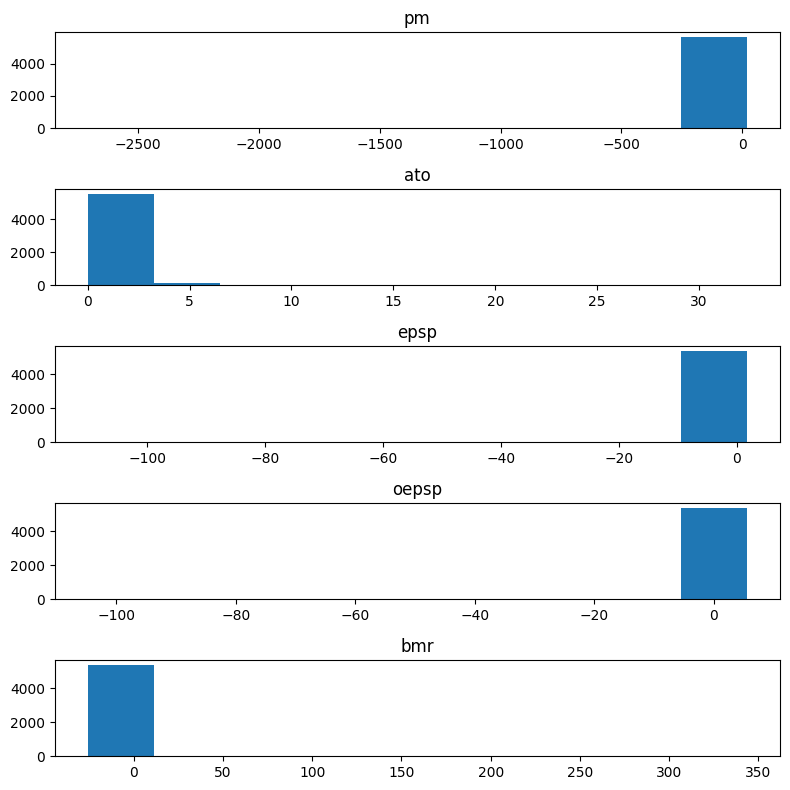

In [47]:
fig, axes = plt.subplots(len(ratios_to_winsorize), 1, constrained_layout=True, figsize=(8,8))
for c, col in enumerate(ratios_to_winsorize):
  axes[c].hist(original_data[col])
  axes[c].set_title(col, loc='center', wrap=True)
plt.tight_layout()
plt.show()

**En los histogramas podemos observar como hay demasiado espacio en blanco alrededor de los valores. Esto se puede dar gracias a valores extremos. Antes en el descriptive statistics, teníamos valores en infinito. Los valores en infinito fueron reemplazados por NaNs. Sin embargo, aun así en los histogramas observamos que pueden aún haber valores extremos. Es por esto que es necesario aplicar la winsorización  para recortar los valores extremos, reemplazandolos por valores menos extremos pero aún dentro de un rango específico.**

**Al aplicar la winsorización podremos tener una mejor visualización, reducir el impacto de valores atípicos y mejorar la estabilidad de las estadísticas.**

In [48]:
# Define the ratios for winsorization
ratios_to_winsorize = ['pm', 'ato', 'epsp', 'oepsp', 'bmr']

# Define the quantile thresholds (keep at least 98% of data, in this case we keep 90%)
lower_quantile = 0.05  # 1% quantile
upper_quantile = 0.95  # 99% quantile

# Create a new DataFrame for winsorized data
winsorized_data = original_data.copy()

# Apply winsorization for each ratio
for ratio in ratios_to_winsorize:
    lower_threshold = winsorized_data[ratio].quantile(lower_quantile)
    upper_threshold = winsorized_data[ratio].quantile(upper_quantile)

    # Apply winsorization to the ratio column
    winsorized_data[ratio] = np.where(winsorized_data[ratio] < lower_threshold, lower_threshold, winsorized_data[ratio])
    winsorized_data[ratio] = np.where(winsorized_data[ratio] > upper_threshold, upper_threshold, winsorized_data[ratio])

winsorized_data[['pm', 'ato', 'epsp', 'oepsp', 'bmr']].describe()

,pm,ato,epsp,oepsp,bmr
count,"5,657.00","5,657.00","5,384.00","5,384.00","5,380.00"
mean,0.02,0.91,0.00,0.04,0.45
std,0.17,0.66,0.10,0.10,0.38
min,-0.47,0.11,-0.31,-0.24,-0.05
25%,-0.01,0.42,-0.00,0.01,0.16
50%,0.05,0.72,0.03,0.06,0.35
75%,0.10,1.28,0.06,0.09,0.64
max,0.29,2.55,0.11,0.19,1.39


<ipython-input-49-758e2f14a0db>:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


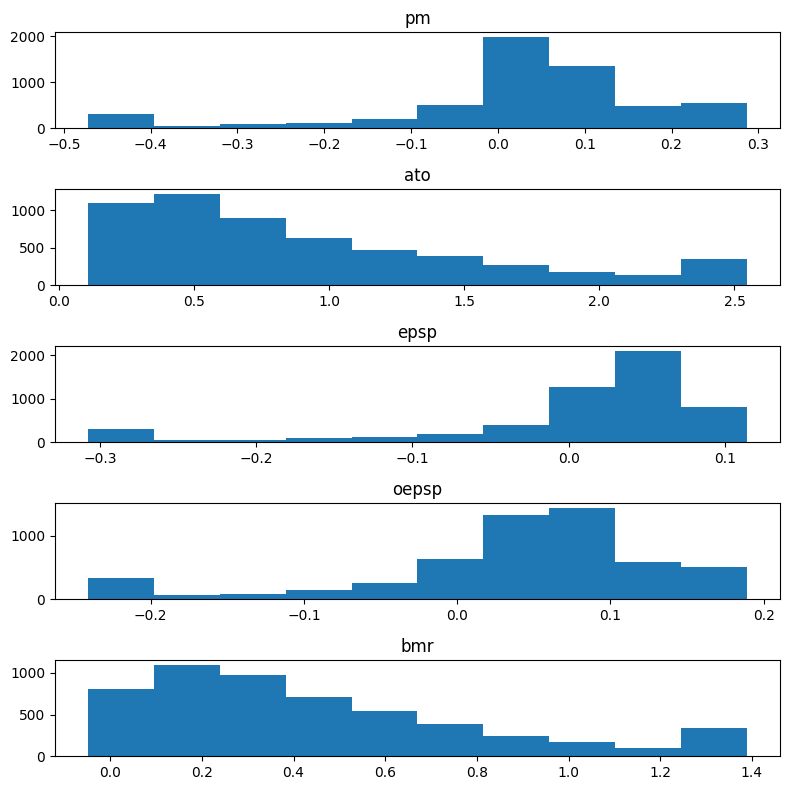

In [49]:
fig, axes = plt.subplots(len(ratios_to_winsorize), 1, constrained_layout=True, figsize=(8,8))
for c, col in enumerate(ratios_to_winsorize):
  axes[c].hist(winsorized_data[col])
  axes[c].set_title(col, loc='center', wrap=True)
plt.tight_layout()
plt.show()

**Ahora tras haber aplicado la winsorización, podemos observar como los histogramas parecen estar mas llenos, esto indica que los valores extremos han sido ajustados o truncados, lo que resulta en una distribución que muestra mas claro como estan concentrados los datos.**

**El histograma de PM muestra que el margen de beneficio de las empresas es relativamente bajo. La mayoría de las empresas tienen un margen de beneficio entre 0 y 0.2. Esto nos puede indicar que la industria de Servicios es un sector competitivo con márgenes de beneficio relativamente bajo.**

**En el histograma de ATO se muestra que la mayoría de las empresas tienen un ato de entre 0.5 y 1. Solo un pequeño número de empresas tiene un ATO superior a 1.**

**De la misma manera podemos ver en el histograma de BMR que la mayoría de las empresas tienen un BMR inferior a 1. Esto se puede deber a que las empresas de servicios suelen tener activos intangibles, como la marca, la reputación o la propiedad intelectual, que no se reflejan en sus balances**







## 1.2.3 Multicollienarity

Do the multicollienarity test considering all numeric independent variables:

profit margin, asset turn over, epsp, oepsp, bmr

Interpret the test. If there is a multicollienarity problem, propose how to solve it.

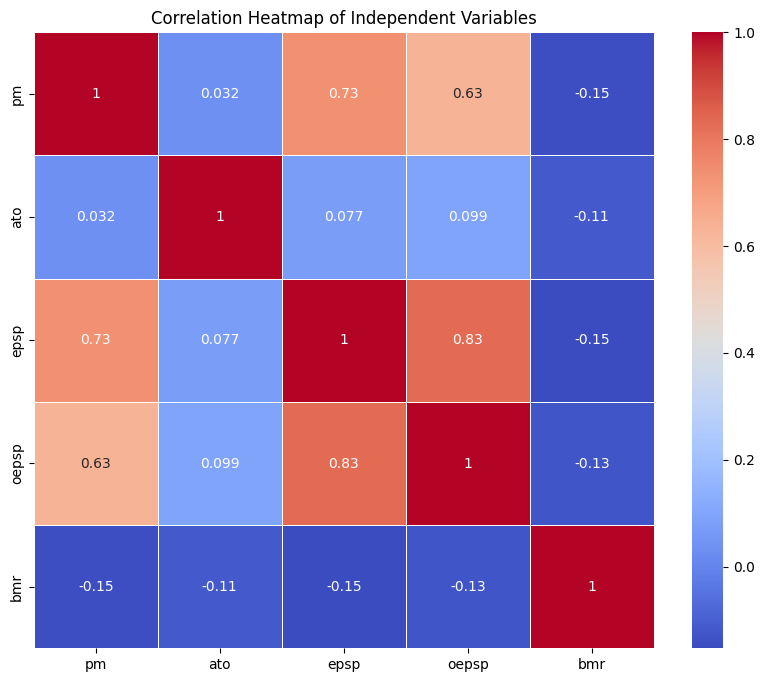

In [50]:
# independent variables
numeric_independent_vars = ['pm', 'ato', 'epsp', 'oepsp', 'bmr']

# Calculate the correlation matrix
correlation_matrix = winsorized_data[numeric_independent_vars].corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Independent Variables')
plt.show()

In [51]:
winsorized_data[numeric_independent_vars].corr()

,pm,ato,epsp,oepsp,bmr
pm,1.00,0.03,0.73,0.63,-0.15
ato,0.03,1.00,0.08,0.10,-0.11
epsp,0.73,0.08,1.00,0.83,-0.15
oepsp,0.63,0.10,0.83,1.00,-0.13
bmr,-0.15,-0.11,-0.15,-0.13,1.00


***Para analizar la multicolinealidad se hizo una matriz de correlacion para evaluar si existen correlaciones fuertes entre las variables independientes. Podemos observar como Profit Margin tiene una correlación positiva y moderada del 0.60 con las ganancias por acción operativas (oepsp). De la misma manera el pm y el epsp tambien tienen una correlacion de 0.66. Las relaciones de las demás variables independientes se mantienen negativas y muy debiles llegando a valores cercanos al 0.***

***Como la mayoría de las correlaciones de las variables no son altas, podemos decir que la multicolinealidad no es un problema en este caso. Sin embargo, podemos analizar el Factor de Inflación de la Varianza para tener un mejor criterio.***

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

multicollinearity = winsorized_data.copy()
multicollinearity = winsorized_data.dropna()
x = multicollinearity[['pm', 'ato', 'epsp', 'oepsp', 'bmr']]
X = sm.add_constant(x)

In [53]:
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

,variable,VIF
0,const,5.15
1,pm,2.19
2,ato,1.02
3,epsp,4.23
4,oepsp,3.27
5,bmr,1.04


**Con los resultados del Factor de Inflación de la Varinza, podemos conlcuir lo siguiente:**

**- El valor VIF para la cosntante es de 5.15, lo cual indica cuanto se infla la variabilidad de la constante debido a las relaciones entre las otras variables. A pesar de que esta arriba de 5, no plantea una precupación ya que no es por mucho.**

**- Los valores de VIF para las variables independientes están en niveles razonables ya que todos se encuentran por debajo de 5. Esto significa que la relación entre estas variables no está causando problemas graves de multicolinealidad. Podemos incluir estas variables en nuestro modelo.**

##1.2.4 Multiple regression model
Run a first multiple regression model to examine whether the financial ratios and firm size explain/predict future annual stock returns (one quarter later). For the ratios, use the winsorized version (if the ratio has extreme values)

In [54]:
winsorized_data['ry'] = np.log(winsorized_data['adjprice']) - np.log(winsorized_data.groupby(['firm'])['adjprice'].shift(4))
winsorized_data['f1ry'] = winsorized_data.groupby(['firm'])['ry'].shift(-1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
regresion = winsorized_data.copy()
regresion = regresion.dropna()

In [56]:
# Define the dependent variable (y) and independent variables (X)
y = regresion['f4rq']
X = regresion[numeric_independent_vars + ['isSmall', 'isMedium', 'isBig']]

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

In [57]:
# Fit the multiple regression model
model = sm.OLS(y, X, missing='drop').fit()

# Get the model summary
summary = model.summary()

# Print the model summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   f4rq   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     8.166
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           6.79e-10
Time:                        02:39:03   Log-Likelihood:                 201.78
No. Observations:                3392   AIC:                            -387.6
Df Residuals:                    3384   BIC:                            -338.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.007      0.525      0.5

Interpret your model

- Interpret the results of each coefficient (beta and their statistical significance). Remember that the coefficients of categorical dummies have a special interpretation.

- Add interaction terms between firm size and earnings per share deflated by price (epsp or oepsp, in case you eliminated one due to multicollienarity). Re-run the regression and INTERPRET the interaction between these two variables. Also, state the regression equation for each size group.

- Interpret the R-squared of the model

***Tras hacer nuestro modelo podemos observar los siguientes coeficientes para cada variable:***

**Profit Margin (pm): Un aumento de una unidad en el margen de beneficio (pm) se asocia con un aumento de 0.0400 unidades en las futuras tasas de retorno de las acciones. Sin embargo, este efecto no es estadísticamente significativo, ya que el valor p es mayor que 0.05. En resumen, no hay evidencia suficiente para afirmar que las empresas con márgenes de beneficio más altos tienen tasas de retorno de acciones significativamente diferentes.**

**Asset Turnover (ato): Los cambios en la variable de Asset Turnover (ato) tienen un impacto mínimo en las tasas de retorno de las acciones en el modelo, ya que el valor p es mayor que 0.05 y no es estadísticamente significativo.**

**Earnings Per Share (epsp): Un aumento de una unidad en las ganancias por acción (epsp) se asocia con una disminución de 0.1601 unidades en las tasas de retorno de las acciones. Esta relación es estadísticamente significativa, ya que el valor p es menor que 0.05. En resumen, las empresas con mayores ganancias por acción tienden a tener tasas de retorno de acciones ligeramente más bajas.**

**Operating Earnings Per Share (oepsp): Un aumento de una unidad en las ganancias por acción operativas (oepsp) se asocia con un aumento de 0.3620 unidades en las tasas de retorno de las acciones. Esta relación es estadísticamente significativa, ya que el valor p es menor que 0.05. En resumen, las empresas con mayores ganancias por acción operativas tienden a tener tasas de retorno de acciones significativamente más altas.**

**Book to Market Ratio (bmr): Un aumento de una unidad en el Book to Market Ratio (bmr) se asocia con un aumento de 0.0256 unidades en las tasas de retorno de las acciones. Esta relación es estadísticamente significativa, ya que el valor p es menor que 0.05. En resumen, las empresas con un mayor Book to Market Ratio tienden a tener tasas de retorno de acciones significativamente más altas.**

**Tamaño de la Empresa (isSmall, isMedium, isBig): Los valores p asociados a estas variables indican que no tienen un impacto estadísticamente significativo en las tasas de retorno de las acciones, ya que todos los valores p son mayores que 0.05.**

**La r cuadrada significa que alrededor del 1.7% de la variabilidad en las tasas de retorno de las acciones se explica por las variables incluidas en el modelo**

**Con este modelo tenemos las siguientes ecuaciones:**

**Para empresas pequeñas:**

   y = 0.0013 + 0.0606(Profit Margin) + 0.0031(Asset Turnover) - 0.1374(Earnings Per Share) + 0.3411(Operating Earnings Per Share) + 0.0212(Book to Market Ratio) - 0.0023

**Para empresas medianas:**

y = 0.0013 + 0.0606(Profit Margin) + 0.0031(Asset Turnover) - 0.1374(Earnings Per Share) + 0.3411(Operating Earnings Per Share) + 0.0212(Book to Market Ratio) + 0.0015

**Para empresas grandes:**

y = 0.0013 + 0.0606(Profit Margin) + 0.0031(Asset Turnover) - 0.1374(Earnings Per Share) + 0.3411(Operating Earnings Per Share) + 0.0212(Book to Market Ratio) + 0.0021

***Agregamos los términos de interacción para examinar cómo el efecto de una variable independiente en una variable dependiente puede variar en función de otra variable independiente.***

In [58]:
import statsmodels.formula.api as smf
formula = 'f4rq ~ pm + ato + epsp + oepsp + bmr + isSmall + isMedium + isBig + isSmall:epsp + isMedium:epsp + isBig:epsp'
regresion_interaction = smf.ols(formula, data=regresion).fit()
print(regresion_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   f4rq   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.360
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           5.46e-09
Time:                        02:39:03   Log-Likelihood:                 201.84
No. Observations:                3392   AIC:                            -383.7
Df Residuals:                    3382   BIC:                            -322.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0040      0.007      0.537

***Los términos de interacción los podemos interpretar de la siguiente manera:***

**A pesar de la introducción de términos de interacción, el modelo sigue teniendo un R-cuadrado bajo, lo que sugiere que la variabilidad en las tasas de retorno no se explica bien con las variables y las interacciones incluidas en el modelo.**

***Al analizar el valor de R-cuadrado de 0.017 nos indica que las vairbales incluidas en el modelo explican solo una muy pequeña porción (1.7%) de la variabilidad en las tasas de retorno de las acciones. Podemos decir que oepsp tiene un efecto signifiativo en las tasas de retorno de las acciones, mientras que otras variable y términos de interacción no tienen un impacto significativo. ***

Run a multiple regression but now using only the last complete year of data (yearf=2022)

- What differences do you see compared with the previous model? Explain

In [59]:
regresion = winsorized_data.copy()
regresion = regresion.dropna()
regresion = regresion.loc[(regresion['year']==2022) & (regresion['fiscalmonth']==12) & (regresion['status']=='activo')]

regresion_interactions = smf.ols(formula,data=regresion).fit()
print(regresion_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                   f4rq   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     1.809
Date:                Fri, 17 Nov 2023   Prob (F-statistic):              0.129
Time:                        02:39:03   Log-Likelihood:                 23.754
No. Observations:                  30   AIC:                            -27.51
Df Residuals:                      20   BIC:                            -13.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0728      0.048      1.525

**Ahora tras incluir solamente el año pasado (2022), la R-cuadrada paso a ser 0.44. Podemos decir que esto es una mejora significativa en la capacidad explicativa del modelo. AHora, aproximadamente 44.9% de la variabilidad en las tasas de retorno de las accciones se explica por las variables incluidas en el modelo, en comparación con el 1.7% anterior.**

##1.2.5 Regression Diagnosis
Do a diagnosis for possible outliers and influential observations, but using only annual data for 2022. You will end up with a cross-sectional sample with the most recent financial information.

Learn about regression diagnosis [HERE](https://rpubs.com/cdorante/tc3006c_p2) before you work on this section.

Using this cross-sectional dataset with only annual data for 2022, you have to do the following:

In [60]:
regresion = regresion.loc[(regresion['year']==2022) & (regresion['fiscalmonth']==12) & (regresion['status']=='activo')]
data_2022 = regresion.copy()
data_2022

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,mvalue,bookvalue,pct,isSmall,isMedium,isBig,oepsp,epsp,bmr,f1ry
firm,qdate,,,,,,,,,,,,,,,,,,,,,
AGYS,2022Q1,2022q1,12.00,"162,636.00","61,104.00","95,213.00",145.00,0.00,-47.00,33.00,"214,162.00",...,"985,607.56","97,344.00",28,1,0,0,0.01,0.01,0.10,1.36
AIRT,2022Q1,2022q1,12.00,"177,077.00",0.00,"168,322.00","9,552.00","-1,262.00","4,948.00","1,169.00","207,599.00",...,"65,450.68","25,717.00",4,1,0,0,0.13,0.11,0.39,0.22
APPS,2022Q1,2022q1,12.00,"747,596.00","400,486.00","254,869.00","-39,774.00",-23.00,"8,495.00","8,403.00","1,458,509.00",...,"4,247,868.33","516,215.00",66,0,1,0,0.02,0.01,0.12,1.26
ATGE,2022Q2,2022q2,12.00,"1,387,122.00","659,776.00","646,882.00",0.00,"347,532.00","125,528.00","-15,237.00","3,029,175.00",...,"1,623,812.77","1,505,067.00",47,0,1,0,0.05,0.11,0.93,-0.27
BAH,2022Q1,2022q1,12.00,"8,363,700.00","3,899,622.00","3,778,897.00","11,214.00",163.00,"92,352.00","137,466.00","6,025,575.00",...,"11,705,355.31","1,046,721.00",95,0,0,1,0.06,0.04,0.09,0.53
BR,2022Q2,2022q2,12.00,"5,709,100.00","4,116,900.00","832,300.00","-3,000.00",0.00,"84,700.00","133,100.00","8,168,800.00",...,"16,710,684.90","1,919,000.00",88,0,0,1,0.05,0.03,0.11,0.33
CACI,2022Q2,2022q2,12.00,"6,202,917.00","4,051,188.00","1,655,400.00",0.00,0.00,"41,757.00","87,778.00","6,629,431.00",...,"6,597,216.80","3,053,543.00",70,0,0,1,0.08,0.06,0.46,0.51
CIDM,2022Q1,2022q1,12.00,"56,054.00",0.00,"56,979.00","2,763.00",-59.00,355.00,-788.00,"104,636.00",...,"142,275.22","40,950.00",14,1,0,0,-0.01,0.02,0.29,-1.51
DRI,2022Q2,2022q2,12.00,"9,630,000.00","7,635,000.00","832,800.00",0.00,"-1,900.00","68,700.00","138,800.00","10,135,800.00",...,"14,020,806.93","2,198,200.00",82,0,0,1,0.08,0.07,0.16,0.42


- Using matrix algebra calculate the beta coefficients of the same regression model

In [61]:
# matrix algebra
# Columna de unos
data_2022['constant'] = 1

columnas = ['constant','pm','ato','epsp', 'oepsp', 'bmr','isSmall','isMedium','isBig']
data_2022 = data_2022.dropna()

# I set x as a matrix with the column of 1's and the values of X:
x = data_2022[columnas].values

# I set y as the dependent variable:
y = data_2022['f4rq'].values

# I calculate the matrix multiplication X'X:
xtranspose_x = np.matmul(x.transpose(), x)

# I calculate the matrix multiplication X'Y:
xtranspose_y = np.matmul(x.transpose(),y)

# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
inversa_transpose = np.linalg.inv(xtranspose_x)

# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients)
betas = np.matmul(inversa_transpose,xtranspose_y)
list(betas)

[-0.48426404631779807,
 -2.2701934966630577,
 -0.21654219280091197,
 -13.947740971336676,
 16.451219137901933,
 0.25462870325855846,
 0.6088026603778878,
 0.337815531731251,
 0.4833412744379775]

- Using matrix algebra calculate the standard errors of the beta coefficients (optional)

In [62]:
# # Paso 1: Calcular el vector de residuales
# y_hat = np.matmul(x, betas)
# residuals = y - y_hat

# # Paso 2: Calcular la varianza residual
# n = len(y)  # número de observaciones
# k = len(columnas)  # número de coeficientes
# var_residual = np.sum(residuals**2) / (n - k)

# # Paso 3: Calcular la matriz de varianza y covarianza de los coeficientes beta
# var_betas = var_residual * np.diag(inversa_transpose)

# # Paso 4: Calcular los errores estándar de los coeficientes beta
# se_betas = np.sqrt(var_betas)

# # Imprimir o utilizar los errores estándar de los coeficientes beta
# for i, col in enumerate(columnas):
#     print(f"Error estándar de {col}: {se_betas[i]}")

In [63]:
#errores estándar de los coeficientes beta
std_err = regresion_interactions.bse  # Contiene los errores estándar de los coeficientes
std_err

Intercept       0.05
pm              0.31
ato             0.05
epsp            0.86
oepsp           0.77
bmr             0.08
isSmall         0.06
isMedium        0.06
isBig           0.07
isSmall:epsp    0.71
isMedium:epsp   0.85
isBig:epsp      1.48
dtype: float64

- Using matrix algebra calculate the R-squared and the adjusted R-squared of the model (optional)

In [64]:
# # Paso 1: Calcular la suma total de cuadrados (SST)
# y_mean = np.mean(y)
# sst = np.sum((y - y_mean)**2)

# # Paso 2: Calcular la suma de cuadrados de los residuos (SSR)
# ssr = np.sum(residuals**2)

# # Paso 3: Calcular el coeficiente de determinación R-squared
# r_squared = 1 - (ssr / sst)

# # Paso 4: Calcular el número de observaciones y coeficientes
# n = len(y)
# k = len(columnas)

# # Paso 5: Calcular el coeficiente de determinación ajustado R-squared
# adj_r_squared = 1 - ((ssr / (n - k)) / (sst / (n - 1)))

# # Imprimir o utilizar los resultados
# print(f"Coeficiente de determinación R-squared: {r_squared}")
# print(f"Coeficiente de determinación ajustado R-squared: {adj_r_squared}")

In [65]:
# R-cuadrado y R-cuadrado ajustado
r_squared = regresion_interactions.rsquared
adjusted_r_squared = regresion_interactions.rsquared_adj
print(f"R-cuadrado: {r_squared}")
print(f"R-cuadrado ajustado: {adjusted_r_squared}")

R-cuadrado: 0.4487504828393186
R-cuadrado ajustado: 0.20068820011701205


- Using matrix algebra calculate the Hat Matrix

In [66]:
#The formular for calculating the Hat Matrix is h = X((X'X)^-1)*X'
xtranspose = x.transpose() # X'
xtxinv = np.linalg.inv(np.matmul(xtranspose,x)) #(X'X)^-1
xmxtxinv = np.matmul(x,xtxinv) #X((X'X)^-1)
hat = np.matmul(xmxtxinv,xtranspose) # X((X'X)^-1)*X'
hat

array([[ 3.34933366e-01,  2.49281441e-01,  2.12552118e-01,
         1.31716601e-01, -7.84185142e-02, -3.87255487e-02,
        -1.24927397e-01,  3.19682727e-01, -6.60202554e-02,
         1.47336262e-01, -1.41492458e-01,  1.30885984e-01,
        -7.91789517e-02, -1.36544200e-02,  1.16877677e-01,
        -1.73960194e-01,  1.55468319e-01,  1.16540430e-01,
         3.03975047e-01,  9.90793678e-02,  1.58331096e-01,
         2.80651865e-02,  1.74657652e-01,  2.02338122e-01,
         2.30049832e-01,  8.31693732e-02, -1.27340885e-01,
         2.38064878e-01,  1.40233067e-01,  1.86052987e-01],
       [ 4.66349592e-02,  2.26686021e-01, -1.75683794e-01,
        -1.52733334e-01,  3.11661000e-01,  3.34951937e-01,
         3.50783073e-01,  5.58044133e-02,  3.78307209e-01,
        -1.53255076e-02,  3.79563652e-01, -2.42432779e-01,
         3.39496230e-01,  2.76325841e-01, -5.10407296e-02,
         3.86332690e-01,  1.34477599e-01, -1.42772995e-01,
         1.12097323e-01, -2.03475074e-01, -2.28703391e-

In [67]:
# #  Hat Matrix
# hat_matrix = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))
# hat_matrix

- With the hat matrix identify possible leverage observations. EXPLAIN why these observations can be leverage points.

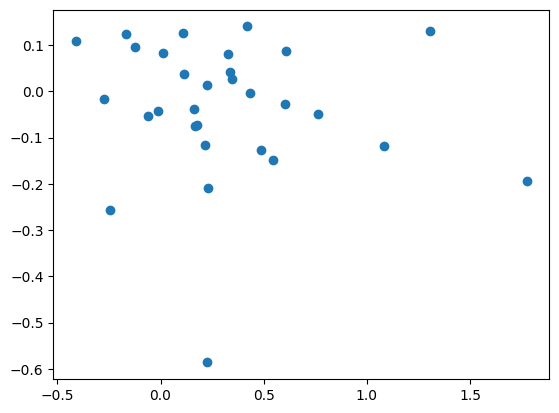

In [68]:
# Get diagonal of hat matrix (leverage)
leverage = np.diag(hat)

# Plot the leverage values
plt.scatter(leverage, y);

In [69]:
# get information to a pandas dataframe
leverage = pd.DataFrame(leverage)
leverage.describe()

,0
count,30.00
mean,0.31
std,0.47
min,-0.41
25%,0.04
50%,0.23
75%,0.47
max,1.78


**Por la gráfica nos podemos dar cuenta que si hay leverage points, y estos los podemos eliminar a partir de la siguiente regla:**

**2(K+1)/N**

**Donde K es el número de variables (X) y N el númeor de observaciones**

**2(9+1)/474**

In [70]:
has_to_be_less = (2*(9+1))/474
has_to_be_less

0.04219409282700422

In [71]:
leverage_points = hat > 2 * (X.shape[1] + 1)

**Podemos ver que los datos deben de ser menores a 0.04219 para no ser considerados leverage points.**

- Identify possible outliers using studentized residuals. EXPLAIN your criteria to identify these outliers, and how studentized residuals work.

In [72]:
studentized_residuals = regresion_interactions.get_influence().resid_studentized_internal
studentized_residuals

array([ 0.28490062, -0.92761704, -1.32800209, -0.05496061, -0.74308614,
        0.67712798,  0.84533905,  0.51318361, -0.03252051, -0.17240663,
        0.24983974,  1.33555313, -1.18990772,  1.05806402, -0.19440787,
       -0.91558967,  0.82265009,  0.39752647,  1.0962488 , -0.18018791,
        0.57401459, -0.29340433, -0.58420595,  0.39751017, -3.5777093 ,
        0.45675832, -0.32212295,  1.57042587,  1.40061945,  0.63642277])

In [73]:
outliers_studentized = np.abs(studentized_residuals) > 2
outliers_studentized

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False])

***Los residuos estandarizados se calculan dividiendo los residuos por una estimación de su error estándar. La estimación del error estándar es diferente para cada puto de datos, y tienen en cuenta el apalancamiento del punto de datos.***

***Como los residuos estandarizados toman en cuenta el apalancamiento , entonces podemos decir que son una medida más confiable de valores atípicos que los rsiduos regulares.***

- Identify possible outliers using Cook’s distance. EXPLAIN your criteria to identify outliers with Cook’s distance and how they work.

In [74]:
cooks_distance = regresion_interactions.get_influence().cooks_distance

cook_outliers_pointFive = []
cook_outliers_3timesmean= []
cook_outliers_4dividedN = []

cook_outliers1aux = []
cook_outliers2aux = []
cook_outliers3aux = []

c=0
for i in cooks_distance[0]:
    if i >= 0.5:
        cook_outliers_pointFive.append(i)
        cook_outliers1aux.append(c)

    elif i >= 3*np.mean(cooks_distance[0]):
        cook_outliers_3timesmean.append(i)
        cook_outliers2aux.append(c)

    elif i >= 4/(len(data_2022)):
        cook_outliers_4dividedN.append(i)
        cook_outliers3aux.append(c)
    c+=1
        #cook_outliers.append(i)

print('Di mayor que 0.5, posibles outliers: ', len(cook_outliers_pointFive))
print('Di mayor que 3 veces el mean del cooks distance, posibles outliers: ', len(cook_outliers_3timesmean))
print('Di mayor que 4/N, posobles outliers: ',len(cook_outliers_4dividedN))

Di mayor que 0.5, posibles outliers:  3
Di mayor que 3 veces el mean del cooks distance, posibles outliers:  1
Di mayor que 4/N, posobles outliers:  1


**Las Distancias de Cook nos ayudan a entender cuando una observaci[on en nuestro conjunto de datos podría tener un impacto significativo en nuestro modelo. Hay algunos criterios que nos ayudan a identificar esto:**

**El primer criterio dice que si el valor de la Distancia de Cook es mayor que 0.5, es recomendable investigar más esa observación, ya que podría tener una influencia en el modelo.**

**El otro criterio establece un umbral en función del tamaño del conjunto de datos. Consideran que una observación es influyente si el valor de la Distancia de Cook es mayor a 4/N, donde N es el número de observaciones en el conjunto de datos.**

**Y el otro criterio es que si el valor de la Distancia de Cook es más de tres veces mayor que el promedio de todas las Distancias de Cook, esa observación podría ser considerada un valor atípico.**

- List the influential observations and decide whether to drop them or keep some of them

In [75]:
distancias = {"Distancia de Cook": cook_outliers_4dividedN, "Posicion": cook_outliers3aux}
outliers_cook = pd.DataFrame(data=distancias)
outliers_cook

,Distancia de Cook,Posicion
0,0.21,24


In [76]:
position_outliers_studentized = np.where(outliers_studentized)[0]
print(position_outliers_studentized)

[24]


In [78]:
studentized_residuals[position_outliers_studentized][0]

-3.5777092991254555

In [79]:
distancias_studentized = {'Studentized': studentized_residuals[position_outliers_studentized][0], 'Posicion': position_outliers_studentized}
outliers_studentized = pd.DataFrame(data=distancias_studentized)
outliers_studentized

,Studentized,Posicion
0,-3.58,24


In [81]:
influential_observations = pd.merge(outliers_cook, outliers_studentized, on='Posicion', how='left')
influential_observations= influential_observations.dropna()
influential_observations

,Distancia de Cook,Posicion,Studentized
0,0.21,24,-3.58


In [83]:
without_influential = winsorized_data.copy()
without_influential = without_influential.dropna()
without_influential = without_influential.loc[(without_influential['year']==2022) & (without_influential['fiscalmonth']==12) & (without_influential['status']=='activo')]
without_influential = without_influential.drop(without_influential.iloc[list(influential_observations.Posicion)].index)
without_influential

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,mvalue,bookvalue,pct,isSmall,isMedium,isBig,oepsp,epsp,bmr,f1ry
firm,qdate,,,,,,,,,,,,,,,,,,,,,
AGYS,2022Q1,2022q1,12.00,"162,636.00","61,104.00","95,213.00",145.00,0.00,-47.00,33.00,"214,162.00",...,"985,607.56","97,344.00",28,1,0,0,0.01,0.01,0.10,1.36
AIRT,2022Q1,2022q1,12.00,"177,077.00",0.00,"168,322.00","9,552.00","-1,262.00","4,948.00","1,169.00","207,599.00",...,"65,450.68","25,717.00",4,1,0,0,0.13,0.11,0.39,0.22
APPS,2022Q1,2022q1,12.00,"747,596.00","400,486.00","254,869.00","-39,774.00",-23.00,"8,495.00","8,403.00","1,458,509.00",...,"4,247,868.33","516,215.00",66,0,1,0,0.02,0.01,0.12,1.26
ATGE,2022Q2,2022q2,12.00,"1,387,122.00","659,776.00","646,882.00",0.00,"347,532.00","125,528.00","-15,237.00","3,029,175.00",...,"1,623,812.77","1,505,067.00",47,0,1,0,0.05,0.11,0.93,-0.27
BAH,2022Q1,2022q1,12.00,"8,363,700.00","3,899,622.00","3,778,897.00","11,214.00",163.00,"92,352.00","137,466.00","6,025,575.00",...,"11,705,355.31","1,046,721.00",95,0,0,1,0.06,0.04,0.09,0.53
BR,2022Q2,2022q2,12.00,"5,709,100.00","4,116,900.00","832,300.00","-3,000.00",0.00,"84,700.00","133,100.00","8,168,800.00",...,"16,710,684.90","1,919,000.00",88,0,0,1,0.05,0.03,0.11,0.33
CACI,2022Q2,2022q2,12.00,"6,202,917.00","4,051,188.00","1,655,400.00",0.00,0.00,"41,757.00","87,778.00","6,629,431.00",...,"6,597,216.80","3,053,543.00",70,0,0,1,0.08,0.06,0.46,0.51
CIDM,2022Q1,2022q1,12.00,"56,054.00",0.00,"56,979.00","2,763.00",-59.00,355.00,-788.00,"104,636.00",...,"142,275.22","40,950.00",14,1,0,0,-0.01,0.02,0.29,-1.51
DRI,2022Q2,2022q2,12.00,"9,630,000.00","7,635,000.00","832,800.00",0.00,"-1,900.00","68,700.00","138,800.00","10,135,800.00",...,"14,020,806.93","2,198,200.00",82,0,0,1,0.08,0.07,0.16,0.42


**Hemos identificado un outlier con la Distancia de Cook y el outlier de Studentized. Luego se ha dropeado este outlier del modelo.**

- Re-run the multiple regression model without the influential observation

Compare the model with the previous one. Which model was better? Explain the differences

In [84]:
modelo = without_influential.copy()
regresion_without_influential = smf.ols(formula, data=modelo).fit()
print(regresion_without_influential.summary())

                            OLS Regression Results                            
Dep. Variable:                   f4rq   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     3.407
Date:                Fri, 17 Nov 2023   Prob (F-statistic):             0.0117
Time:                        02:53:00   Log-Likelihood:                 37.285
No. Observations:                  29   AIC:                            -54.57
Df Residuals:                      19   BIC:                            -40.90
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0725      0.029      2.467

**Tras haber hecho drop del outlier identificado, tenemos un nuevo modelo de regresión. Este nuevo modelo tiene un R-cuadrado de 0.617, lo que significa que explica aproximadamente el 61.7% de la variabilidad en la variable de respuesta (f4rq)**

**El análisis de los coeficientes es el siguiente:**

**Profit Margin (pm): El coeficiente de -0.2562 indica que un aumento en el margen de beneficio se asocia con una disminución de 0.2562 unidades en las futuras tasas de retorno de las acciones. Sin embargo, este efecto no es estadísticamente significativo, ya que el valor p es 0.192.**

**Asset Turnover (ato): El coeficiente de -0.1204 indica que un aumento en la rotación de activos se asocia con una disminución de 0.1204 unidades en las tasas de retorno. Este efecto es estadísticamente significativo, ya que el valor p es 0.002.**

**Earnings Per Share (epsp): El coeficiente de 0.7823 indica que un aumento en las ganancias por acción se asocia con un aumento de 0.7823 unidades en las tasas de retorno. Sin embargo, este efecto no es estadísticamente significativo (valor p = 0.159).**

**Operating Earnings Per Share (oepsp): El coeficiente de 0.3753 indica que un aumento en las ganancias por acción operativas se asocia con un aumento de 0.3753 unidades en las tasas de retorno. Este efecto no es estadísticamente significativo (valor p = 0.436).**

**Book to Market Ratio (bmr): El coeficiente de -0.1306 indica que un aumento en el ratio book-to-market se asocia con una disminución de 0.1306 unidades en las tasas de retorno. Este efecto es estadísticamente significativo (valor p = 0.017).**

**Tamaño de Empresa (isSmall, isMedium, isBig): Estos coeficientes representan el efecto de pertenecer a cada categoría de tamaño de empresa en comparación con la categoría de referencia (posiblemente "isBig"). La variable "isSmall" tiene un efecto positivo estadísticamente significativo, mientras que "isMedium" y "isBig" no son estadísticamente significativas.**

**En conclusión este modelo final a diferencia de los modelos previos, tiene una gran mejora. El R-Cuadrada ha aumentado significativamente a un 0.617 y algunos coeficientes han cambiado significativamente también, lo que indica que la inclusión de los datos del año pasado y la eliminación de outliers han afectado las estimaciones de los parámetros, mejorando la presición del modelo.**